# Libraries 
-------------
-----------------------------------------------

In [1]:
!pip install missingno
!pip install statsmodels
!pip install yellowbrick
!pip install mlxtend

In [2]:
import sys
# sys.path.insert(0, '/kaggle/input/preprocessed-data-ass2-da/source/')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
from Create_Features.Data_Exploration import *
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from mlxtend.frequent_patterns import apriori
# sys.path.insert(0, '/kaggle/input/merged-data/source/')
from sklearn.metrics import silhouette_score
from Create_Features.Read_Data import *
pd.set_option('display.max_rows', 300) 
pd.set_option('display.max_columns', 400000) 

# Read Data 
---
------

**Q1 (30 points) Our goal is to cluster users based on their spending behaviors. Your task is to perform a clustering analysis leveraging the K-means
method and report your findings. You should specify how you select the
right ”K” for the k-means method, and  how you create features. Explain
the resultant clusters (the meaning of each cluster) and judge the quality
of resultant clusters.**

- Select the right ”K” :
    - To determine the optimal value for K, we can use the elbow method or silhouette analysis. In the elbow method, we calculate the sum of squared errors (SSE) for different values of K and select the value of K where the decrease in SSE starts to level off. On the other hand, in silhouette analysis, we calculate the average silhouette score for different values of K, and select the value of K where the score is highest.
    - We will use both method.But we will rely on the silhouette score. The silhouette score is a more reliable measure of the optimal value for K than the elbow method. However, the elbow method is a simpler and more intuitive approach, so it can be useful for getting a rough estimate of the optimal value for K.but mainly we will rely on the silhouette score 

- Create features
    - As we knew that We will reuse the dataset from assignment 1, with a different purpose. In the assignment 1 , we could determine the best combination of features. So, we already did the feature engineering in our data. In this assignment, our motivation is that we will use this processed data( created from 9123_Assn1.2 notebook) and directly select best k and apply kmeans. 
    - To create features, we can use the same set of features that we identified in the previous assignment, which are:

        - authorized_flag_mean	
        - authorized_flag_sum	
        - category_2_mean	
        - category_2_sum	
        - category_3_sum	
        - category_3_mean	
        - category_4_sum	
        - category_4_mean	
        - merchant_id_nunique	
        - purchase_amount_sum	
        - purchase_amount_mean	
        - purchase_amount_max	
        - purchase_amount_min	
        - installments_sum	
        - installments_mean	
        - installments_max	
        - installments_min	
        - purchase_month_mean	
        - purchase_month_max	
        - purchase_month_min	
        - purchase_date_ptp	
        - purchase_date_max	
        - purchase_date_min	
        - month_lag_min	
        - month_lag_max	
        - merchant_category_id_nunique	
        - state_id_nunique	
        - subsector_id_nunique	
        - city_id_nunique	
        - feature_1_min	
        - feature_2_min	
        - feature_3_min	
        - first_active_month_month_min	
        - first_active_month_year_min	
        - score_min ( Note that: 
            - we will need to drop this column to pervent our model from overfitting. Score column is the target column and it considers that our model is cheating if we put it. 
            
- Explain the resultant clusters (the meaning of each cluster) : 

    - we will select each cluster from the data. Then we will get the describe of each cluster. From this decription, we can get the meaning of each cluster.
    
    
- judge the quality of resultant clusters

    - we will judge the quality of resultant clusters through :
        - Visualization 
        - Silhouette Score 
        - Within-cluster SSE

We will continue answering this question in the notebook.


In [3]:
# Read the final proprecessed data 
df = pd.read_csv("preprocessed_Data.csv")
print(" Shape of preprocessed data " , df.shape)
df.head()
df.tail()

 Shape of preprocessed data  (179589, 36)


,card_id,authorized_flag_mean,authorized_flag_sum,category_2_mean,category_2_sum,category_3_sum,category_3_mean,category_4_sum,category_4_mean,merchant_id_nunique,purchase_amount_sum,purchase_amount_mean,purchase_amount_max,purchase_amount_min,installments_sum,installments_mean,installments_max,installments_min,purchase_month_mean,purchase_month_max,purchase_month_min,purchase_date_ptp,purchase_date_max,purchase_date_min,month_lag_min,month_lag_max,merchant_category_id_nunique,state_id_nunique,subsector_id_nunique,city_id_nunique,feature_1_min,feature_2_min,feature_3_min,first_active_month_month_min,first_active_month_year_min,score_min
0,C_ID_00007093c1,0.692308,9,3.0,39.0,26,2.000000,13,1.000,8,-12.155149,-0.935011,-0.571280,-1.261795,13,1.000000,1,1,5.461538,11,2,25661204.0,1.522754e+09,1.497093e+09,-10,0,7,1,7,1,5,1,1,2,2017,0.134077
1,C_ID_0001506ef0,0.914894,43,3.0,141.0,48,1.021277,47,1.000,24,-56.130320,-1.194262,-0.591272,-1.348966,1,0.021277,1,0,6.808511,12,1,37299509.0,1.521710e+09,1.484411e+09,-15,-1,15,1,11,1,2,2,0,7,2016,0.884295
2,C_ID_000183fdda,0.969388,95,3.0,294.0,210,2.142857,98,1.000,54,-109.625840,-1.118631,-0.588562,-1.338998,112,1.142857,2,1,6.979592,12,1,22651024.0,1.524750e+09,1.502099e+09,-8,0,25,1,15,1,4,1,0,9,2017,-0.264433
3,C_ID_00027503e2,0.552632,21,3.0,114.0,38,1.000000,0,0.000,10,-51.410260,-1.352902,-1.324768,-1.369913,0,0.000000,0,0,7.552632,12,1,20483171.0,1.516364e+09,1.495880e+09,-10,-2,6,1,5,1,3,1,1,5,2017,0.812872
4,C_ID_0002c7c2c1,0.875000,49,1.0,56.0,56,1.000000,49,0.875,35,-62.864900,-1.122587,-0.604936,-1.336136,0,0.000000,0,0,7.553571,12,1,29611488.0,1.521881e+09,1.492270e+09,-11,0,18,1,9,3,3,2,1,4,2017,1.288514


,card_id,authorized_flag_mean,authorized_flag_sum,category_2_mean,category_2_sum,category_3_sum,category_3_mean,category_4_sum,category_4_mean,merchant_id_nunique,purchase_amount_sum,purchase_amount_mean,purchase_amount_max,purchase_amount_min,installments_sum,installments_mean,installments_max,installments_min,purchase_month_mean,purchase_month_max,purchase_month_min,purchase_date_ptp,purchase_date_max,purchase_date_min,month_lag_min,month_lag_max,merchant_category_id_nunique,state_id_nunique,subsector_id_nunique,city_id_nunique,feature_1_min,feature_2_min,feature_3_min,first_active_month_month_min,first_active_month_year_min,score_min
179584,C_ID_fffeced303,0.966667,29,1.000000,30.0,61,2.033333,28,0.933333,19,-33.713863,-1.123795,-0.638797,-1.338998,31,1.033333,2,1,5.533333,11,1,32905088.0,1.524841e+09,1.491936e+09,-12,0,11,1,6,2,2,1,0,4,2017,0.362965
179585,C_ID_fffeed3a89,0.992424,131,3.727273,492.0,272,2.060606,112,0.848485,106,-144.533100,-1.094948,-0.591272,-1.347635,140,1.060606,2,0,3.689394,12,1,11602658.0,1.525120e+09,1.513517e+09,-4,0,35,7,19,10,4,3,0,11,2017,-0.085357
179586,C_ID_ffff579d3a,0.902439,74,1.000000,82.0,85,1.036585,21,0.256098,45,-100.351140,-1.223794,-0.676206,-1.344171,3,0.036585,1,0,7.780488,12,1,19426911.0,1.521623e+09,1.502196e+09,-8,-1,22,1,13,4,2,2,0,8,2017,1.530061
179587,C_ID_ffff828181,1.000000,10,1.600000,16.0,22,2.200000,2,0.200000,9,-10.552799,-1.055280,-0.861350,-1.261795,12,1.200000,2,1,8.600000,12,1,39815170.0,1.524927e+09,1.485112e+09,-15,0,7,3,7,4,2,1,0,1,2015,-0.600063
179588,C_ID_fffffd5772,1.000000,1,3.000000,3.0,2,2.000000,0,0.000000,1,-0.785372,-0.785372,-0.785372,-0.785372,1,1.000000,1,1,10.000000,10,10,0.0,1.508520e+09,1.508520e+09,-6,-6,1,1,1,1,2,1,0,8,2017,-1.073077


# Explore Data
---------
----------

In [4]:
explore = Explore_Data(df)

## Summary and describe Data 
--------
--------

In [9]:
explore.summary()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179589 entries, 0 to 179588
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   card_id                       179589 non-null  object 
 1   authorized_flag_mean          179589 non-null  float64
 2   authorized_flag_sum           179589 non-null  int64  
 3   category_2_mean               179589 non-null  float64
 4   category_2_sum                179589 non-null  float64
 5   category_3_sum                179589 non-null  int64  
 6   category_3_mean               179589 non-null  float64
 7   category_4_sum                179589 non-null  int64  
 8   category_4_mean               179589 non-null  float64
 9   merchant_id_nunique           179589 non-null  int64  
 10  purchase_amount_sum           179589 non-null  float64
 11  purchase_amount_mean          179589 non-null  float64
 12  purchase_amount_max           179589 non-nul

,card_id,authorized_flag_mean,authorized_flag_sum,category_2_mean,category_2_sum,category_3_sum,category_3_mean,category_4_sum,category_4_mean,merchant_id_nunique,purchase_amount_sum,purchase_amount_mean,purchase_amount_max,purchase_amount_min,installments_sum,installments_mean,installments_max,installments_min,purchase_month_mean,purchase_month_max,purchase_month_min,purchase_date_ptp,purchase_date_max,purchase_date_min,month_lag_min,month_lag_max,merchant_category_id_nunique,state_id_nunique,subsector_id_nunique,city_id_nunique,feature_1_min,feature_2_min,feature_3_min,first_active_month_month_min,first_active_month_year_min,score_min
count,179589,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,1.795890e+05,1.795890e+05,1.795890e+05,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000
unique,179589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C_ID_00007093c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.934789,53.477340,2.222029,123.020313,80.807355,1.547189,31.294155,0.498056,24.867637,-64.622850,-1.103418,-0.738674,-1.293643,23.985439,0.547189,0.913319,0.494368,6.205120,10.616792,1.921604,2.127135e+07,1.518270e+09,1.496999e+09,-9.065477,-1.115046,12.515761,1.487251,8.695310,2.840347,3.105474,1.741192,0.567702,7.376059,2016.513517,-0.391081
std,NaN,0.105662,73.841066,1.476469,219.518784,109.925980,0.543252,62.699454,0.439753,24.428025,89.935527,0.129176,0.187904,0.113251,50.734813,0.543252,0.794326,0.511672,2.083254,2.598861,2.109081,1.192343e+07,8.092257e+06,1.112524e+07,4.110202,2.045385,8.889336,0.919149,4.894876,2.450354,1.185578,0.750362,0.495397,3.344820,0.783324,3.768022
min,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-3247.223100,-1.373942,-1.373942,-1.374001,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00,1.483237e+09,1.483229e+09,-15.000000,-15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2011.000000,-33.219280
25%,NaN,0.911111,10.000000,1.000000,18.000000,16.000000,1.000000,1.000000,0.006920,8.000000,-80.638640,-1.199301,-0.841528,-1.354598,0.000000,0.000000,0.000000,0.000000,4.928962,11.000000,1.000000,1.226991e+07,1.515701e+09,1.485560e+09,-13.000000,-1.000000,6.000000,1.000000,5.000000,1.000000,2.000000,1.000000,0.000000,5.000000,2016.000000,-0.884682
50%,NaN,0.970588,28.000000,1.055814,51.000000,44.000000,1.977778,6.000000,0.500000,18.000000,-33.898468,-1.121832,-0.673403,-1.333681,2.000000,0.977778,1.000000,0.000000,6.272727,12.000000,1.000000,2.027647e+07,1.521392e+09,1.496265e+09,-9.000000,0.000000,11.000000,1.000000,8.000000,2.000000,3.000000,2.000000,1.000000,8.000000,2017.000000,-0.039700
75%,NaN,1.000000,67.000000,3.000000,132.000000,101.000000,2.013514,34.000000,0.988764,34.000000,-11.634600,-1.028291,-0.591272,-1.286238,26.000000,1.013514,2.000000,1.000000,7.527778,12.000000,2.000000,3.165519e+07,1.524072e+09,1.506700e+09,-6.000000,0.000000,18.000000,2.000000,12.000000,4.000000,4.000000,2.000000,1.000000,10.000000,2017.000000,0.744545


## Check missing values 
----------
----------

/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/opt/conda/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:2848: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


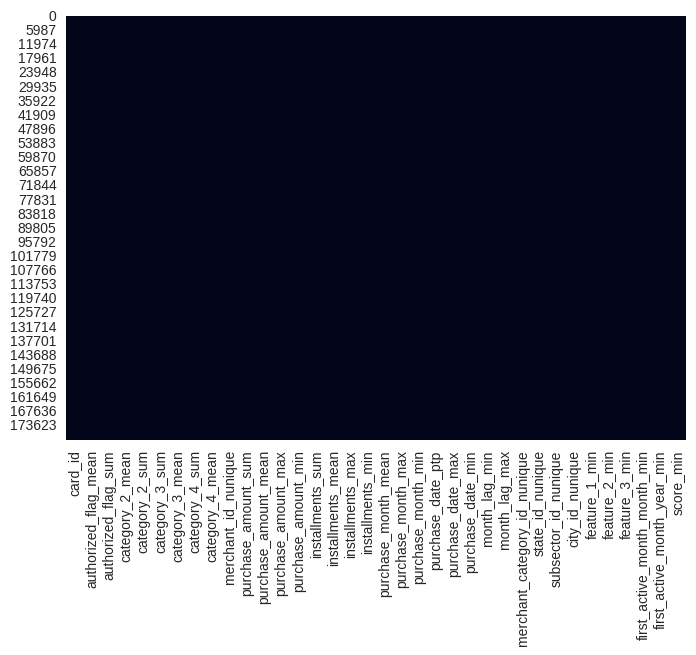

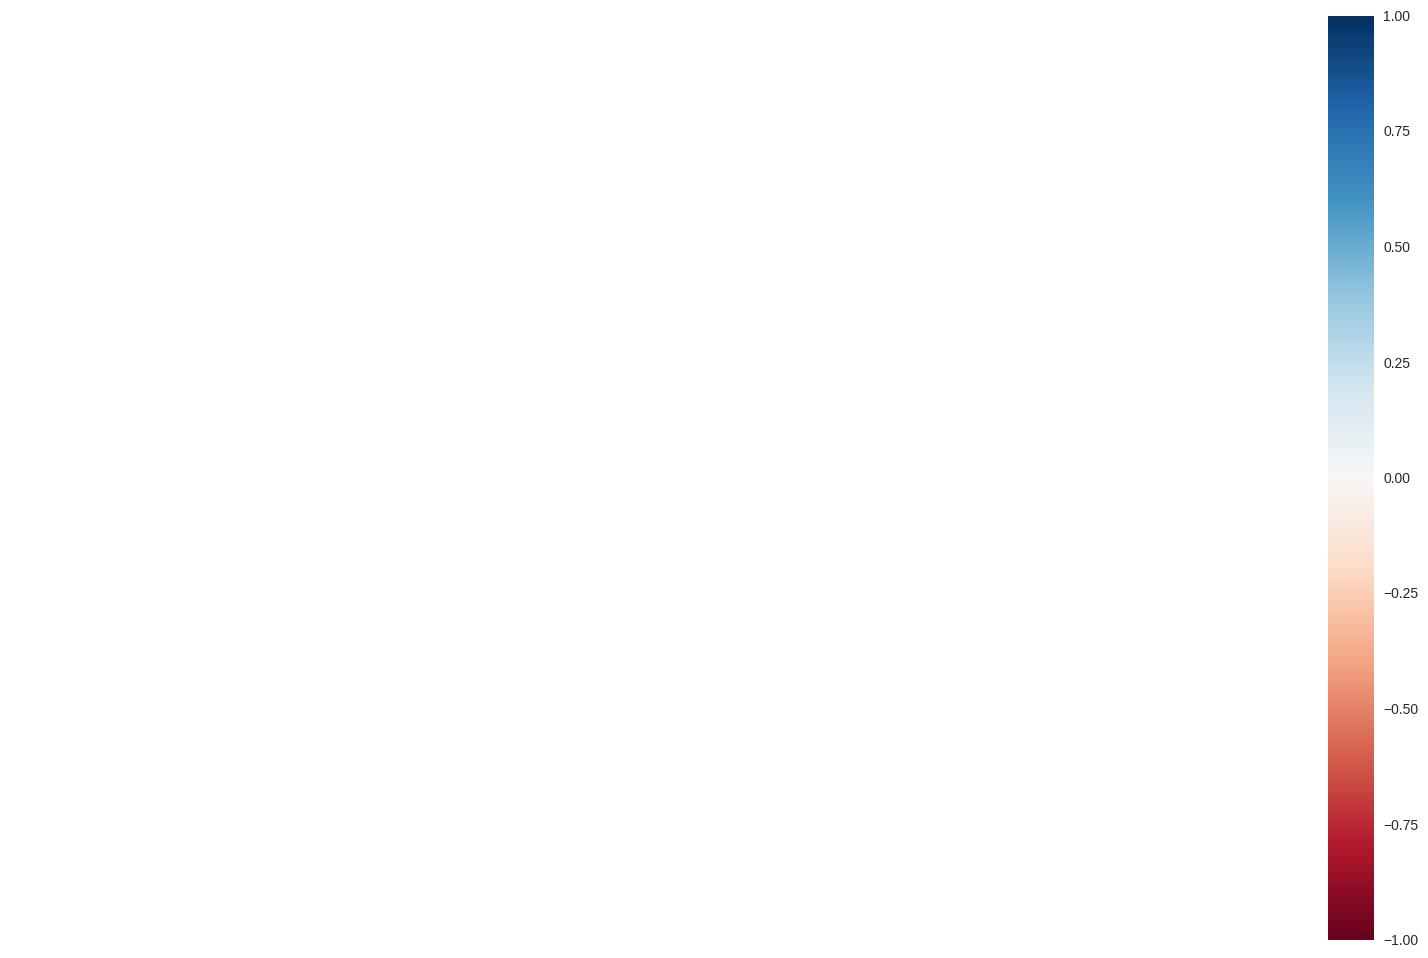

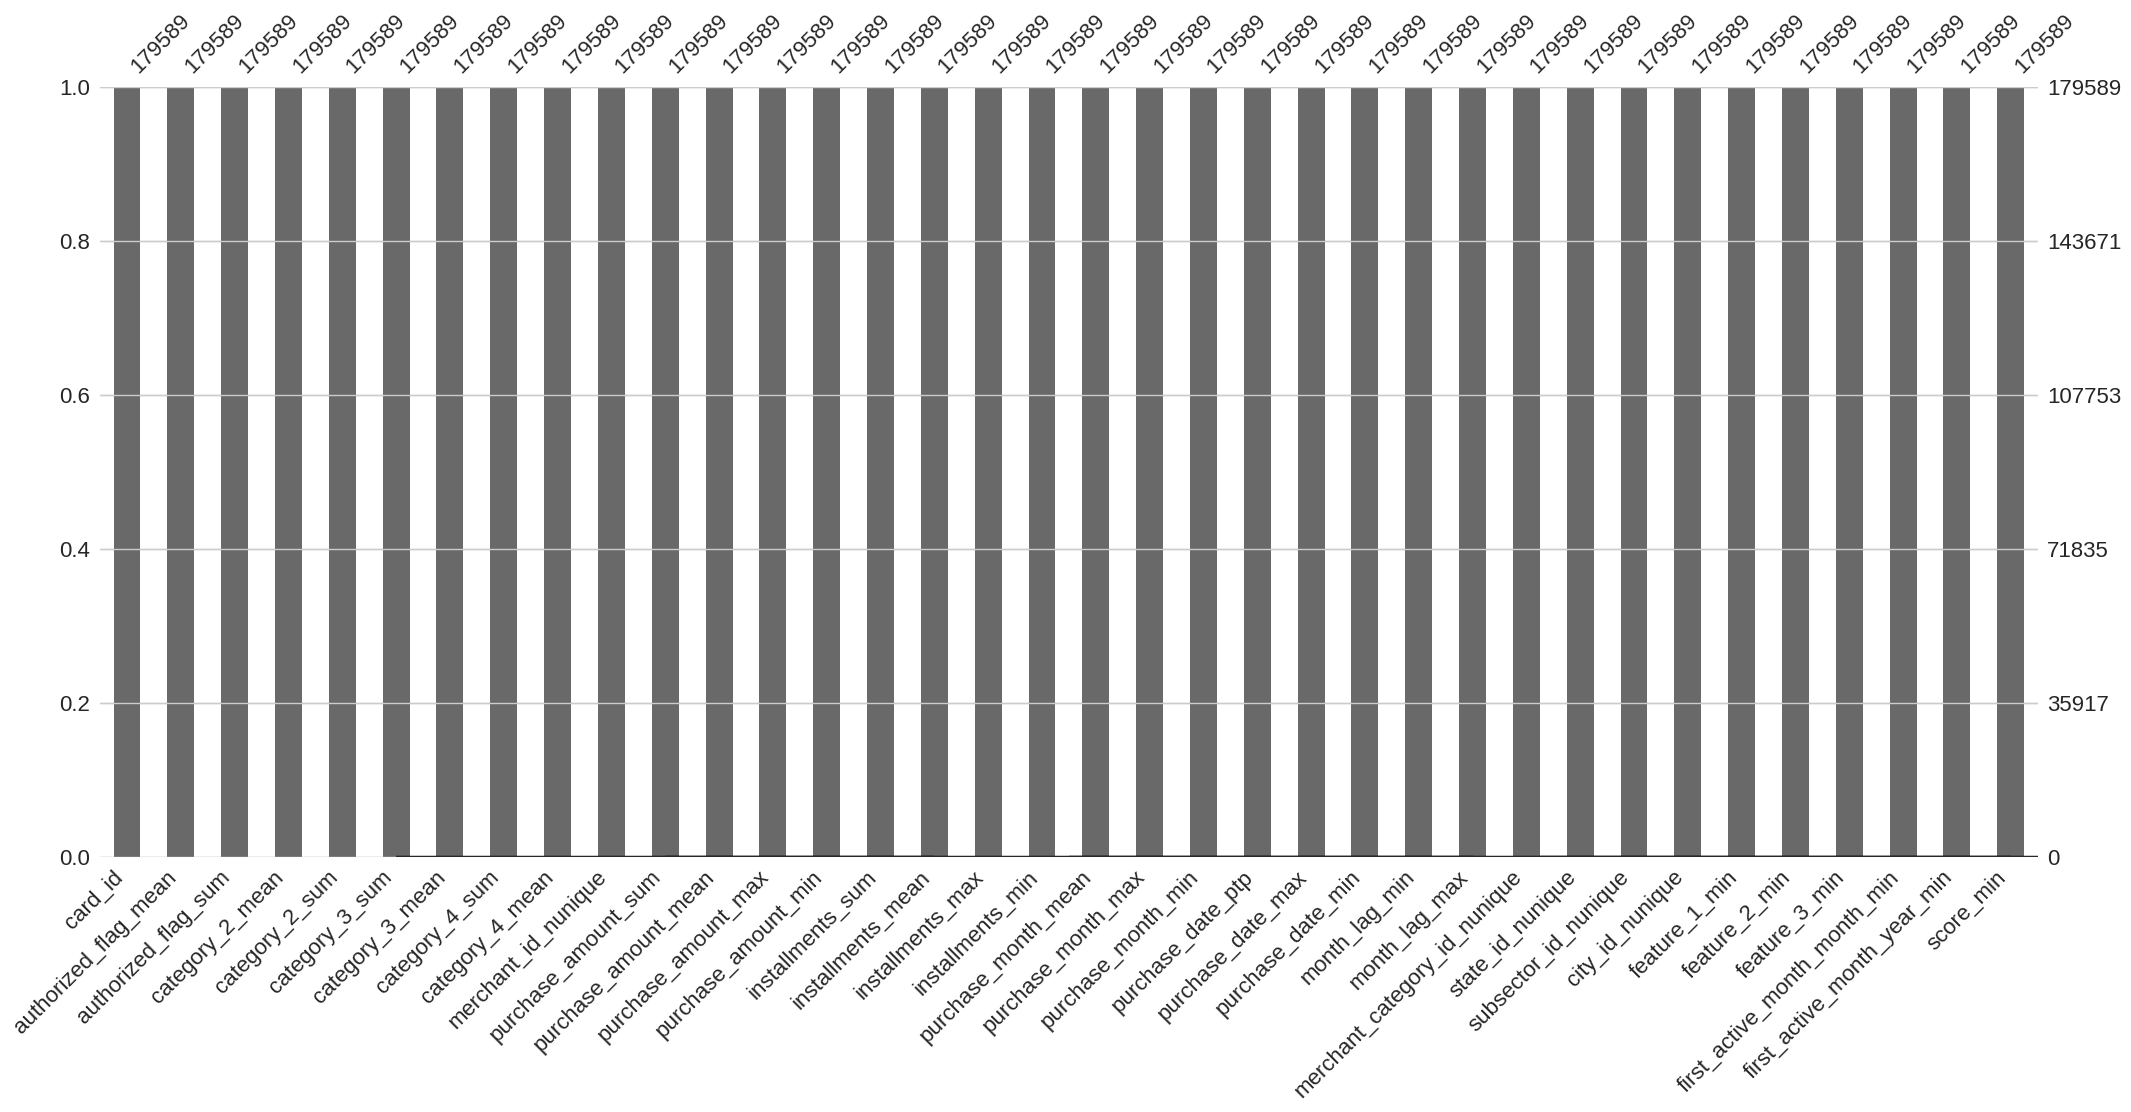

,null_val,percent_null,zero_value,total_percent
card_id,0,0.0,0,0.000
authorized_flag_mean,0,0.0,507,0.282
purchase_month_min,0,0.0,0,0.000
purchase_date_ptp,0,0.0,8036,4.475
purchase_date_max,0,0.0,0,0.000
purchase_date_min,0,0.0,0,0.000
month_lag_min,0,0.0,1497,0.834
month_lag_max,0,0.0,103018,57.363
merchant_category_id_nunique,0,0.0,0,0.000
state_id_nunique,0,0.0,0,0.000


In [10]:
explore.null_values()

## Check Duplication
-------
---------

In [11]:
explore.duplicated_values()

Number of duplicated rows 0


## Visualize distribution of data 
---------
-----------

array([[<Axes: title={'center': 'authorized_flag_mean'}>,
        <Axes: title={'center': 'authorized_flag_sum'}>,
        <Axes: title={'center': 'category_2_mean'}>,
        <Axes: title={'center': 'category_2_sum'}>,
        <Axes: title={'center': 'category_3_sum'}>,
        <Axes: title={'center': 'category_3_mean'}>],
       [<Axes: title={'center': 'category_4_sum'}>,
        <Axes: title={'center': 'category_4_mean'}>,
        <Axes: title={'center': 'merchant_id_nunique'}>,
        <Axes: title={'center': 'purchase_amount_sum'}>,
        <Axes: title={'center': 'purchase_amount_mean'}>,
        <Axes: title={'center': 'purchase_amount_max'}>],
       [<Axes: title={'center': 'purchase_amount_min'}>,
        <Axes: title={'center': 'installments_sum'}>,
        <Axes: title={'center': 'installments_mean'}>,
        <Axes: title={'center': 'installments_max'}>,
        <Axes: title={'center': 'installments_min'}>,
        <Axes: title={'center': 'purchase_month_mean'}>],
       

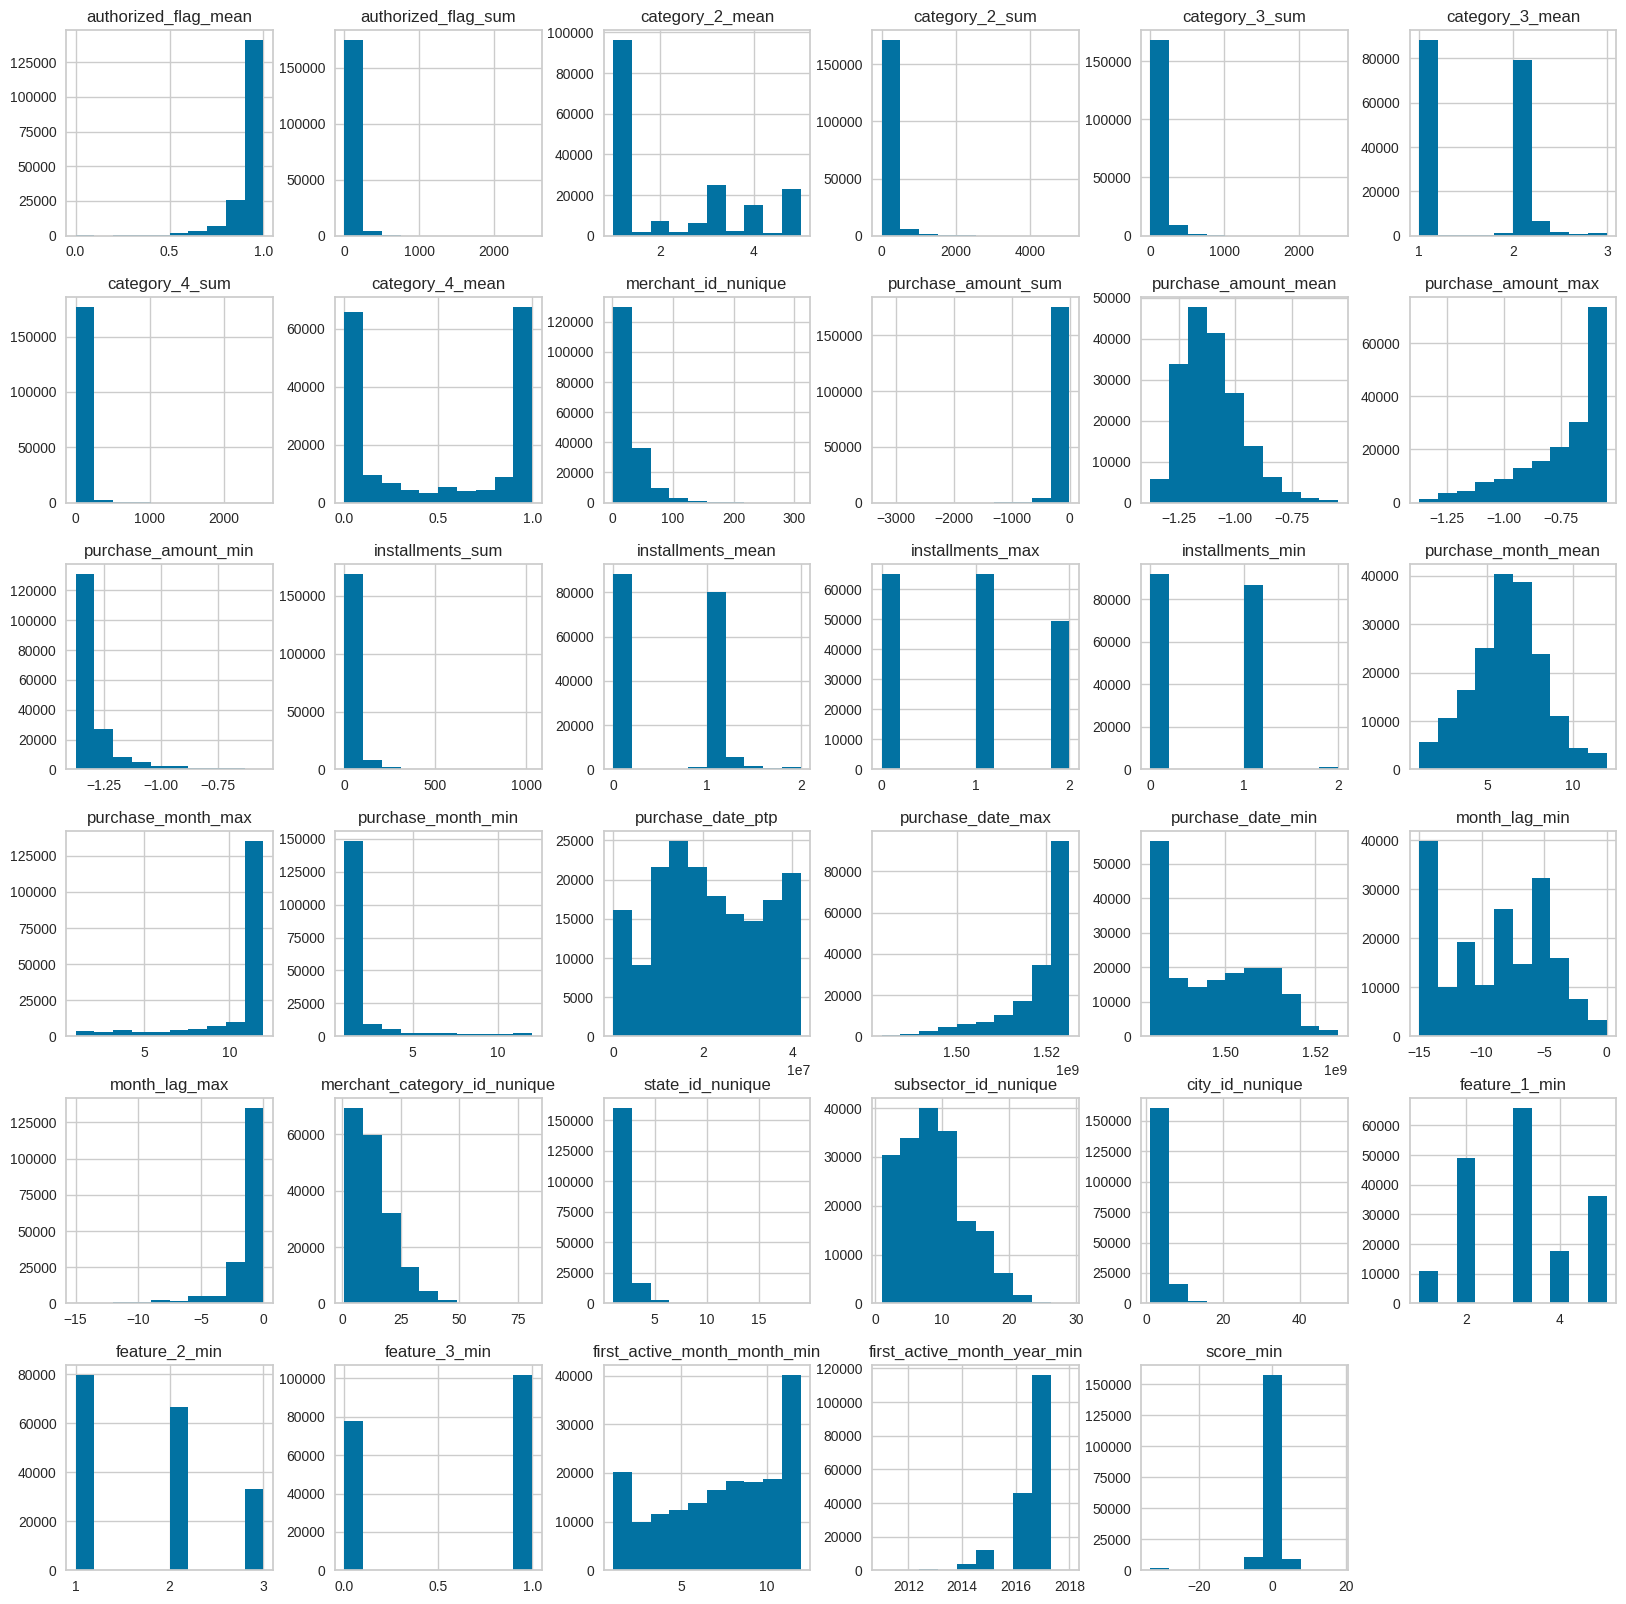

In [5]:
df.hist(figsize=(20,20))

In [5]:
cal_skewnwss = explore.detect_skewed_features()
cal_skewnwss

,skew
category_2_sum,5.230001
category_4_sum,4.836873
installments_sum,4.475929
authorized_flag_sum,3.714263
category_3_sum,3.659123
city_id_nunique,3.244766
purchase_amount_min,3.143122
state_id_nunique,2.928299
purchase_month_min,2.913721
merchant_id_nunique,2.097459


**Observation**

- As you can see, many of the features are skewed. This is a problem because K-means assumes that the data is normally distributed. To address this, we will need to transform the data so that it is more normally distributed.

 ## Key k-means assumptions
- Symmetric distribution of variables (not skewed)

- Variables with same average values

- Variables with same variance

# Data Preprocessing 
---------
-------

We will try two different techniques to handle skewed features and improve performance. We will choose the technique that achieves the highest performance.

- The first technique is to apply power transformation (Yeo-Johnson method) to handle skewness, then apply robust scaling.

- The second technique is to apply robust scaling directly, without power transformation (Yeo-Johnson method).

## 1st technique 
---------------
---------

###  Power transformation
-----
---------

In [6]:
#------------------------------- Reduce skewness ^_^ -------------------------------

'''
This function helps us handle the skewed features through applying yeo-johnson method and visualize distribution of feature after applying yeo-johnson method 
Also, print skew ratio after applying the yeo-johnson method
'''
def remove_skewness(col):
    print(col)
    # apply yeo-johnson method 
    pt = PowerTransformer(standardize=False)
    trans_df = pt.fit_transform(col.values.reshape(-1, 1))
    # plot distribution of feature after applying yeo-johnson method 
    sns.displot(trans_df)
    plt.title(col.index.name)
    
    skew_ratio = pd.DataFrame(np.array(trans_df).astype('float64')).skew()
    print("skewness after yeo-johnson method to reduce skewness " , skew_ratio)
    
    return trans_df 


'\nThis function helps us handle the skewed features through applying yeo-johnson method and visualize distribution of feature after applying yeo-johnson method \nAlso, print skew ratio after applying the yeo-johnson method\n'

0          39.0
1         141.0
2         294.0
3         114.0
4          56.0
          ...  
179584     30.0
179585    492.0
179586     82.0
179587     16.0
179588      3.0
Name: category_2_sum, Length: 179589, dtype: float64
skewness after yeo-johnson method to reduce skewness  0   -0.004808
dtype: float64
0          13
1          47
2          98
3           0
4          49
         ... 
179584     28
179585    112
179586     21
179587      2
179588      0
Name: category_4_sum, Length: 179589, dtype: int64
skewness after yeo-johnson method to reduce skewness  0    0.078397
dtype: float64
0          13
1           1
2         112
3           0
4           0
         ... 
179584     31
179585    140
179586      3
179587     12
179588      1
Name: installments_sum, Length: 179589, dtype: int64
skewness after yeo-johnson method to reduce skewness  0    0.204532
dtype: float64
0           9
1          43
2          95
3          21
4          49
         ... 
179584     29
179585    13

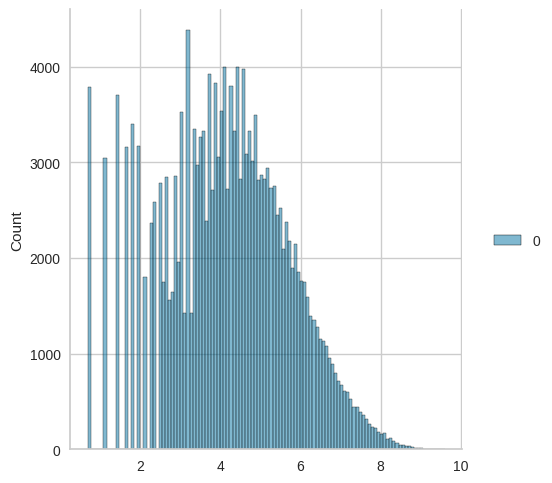

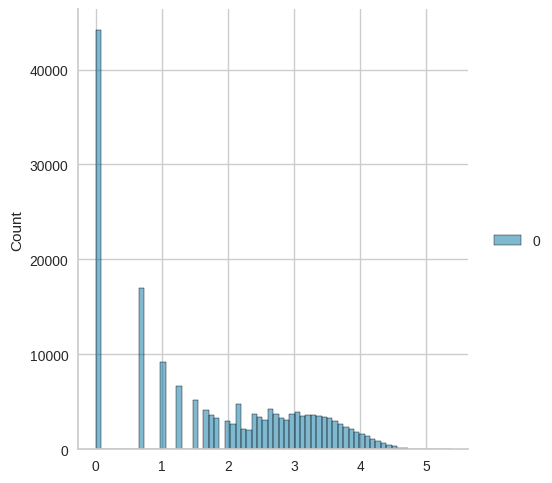

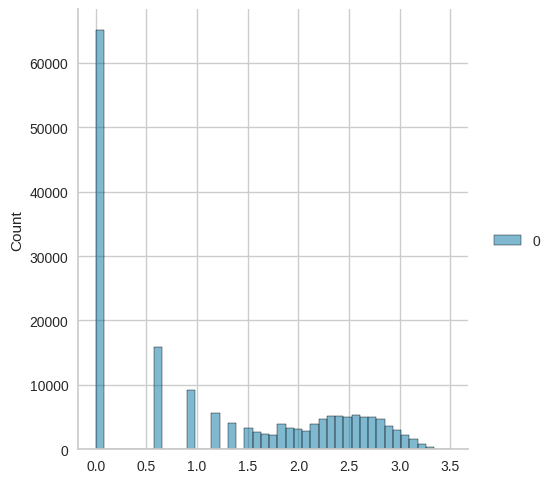

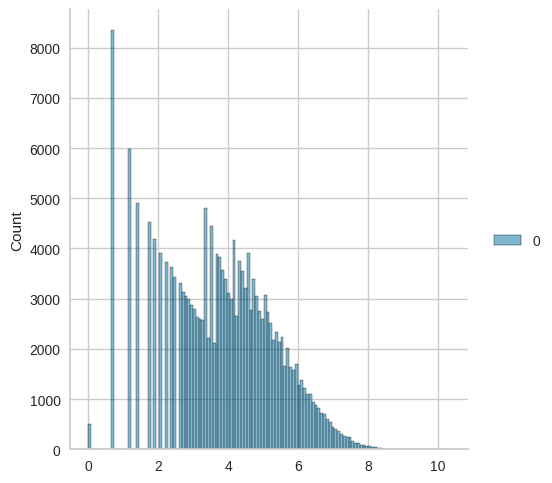

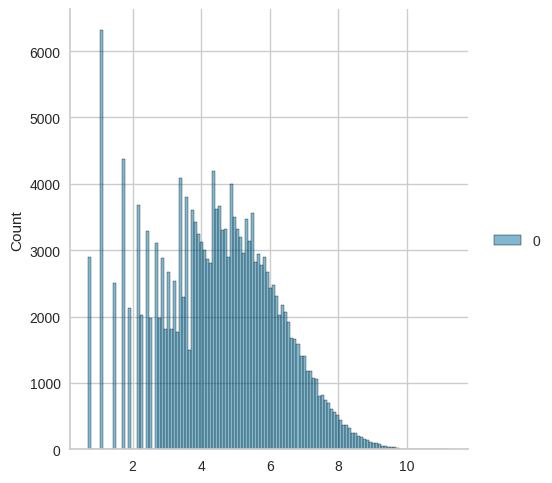

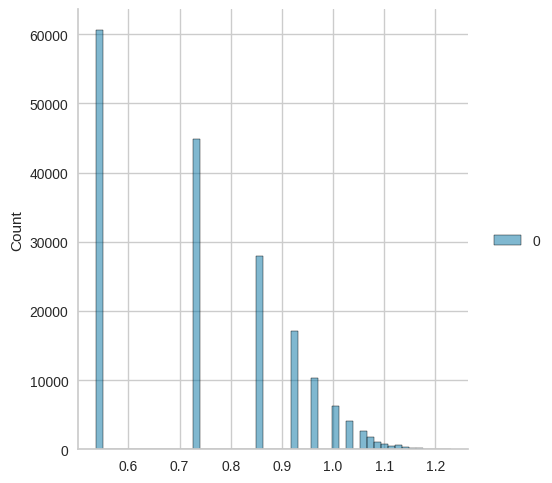

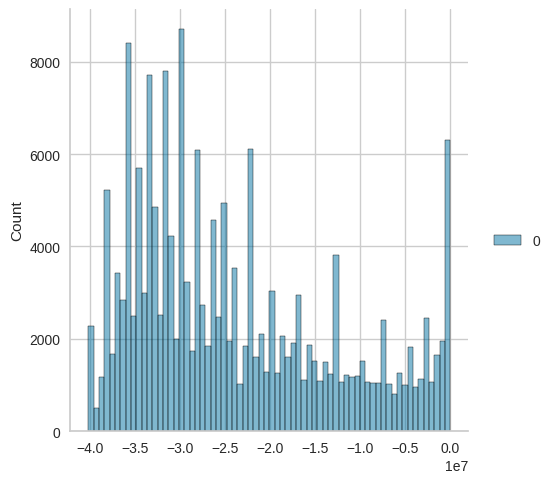

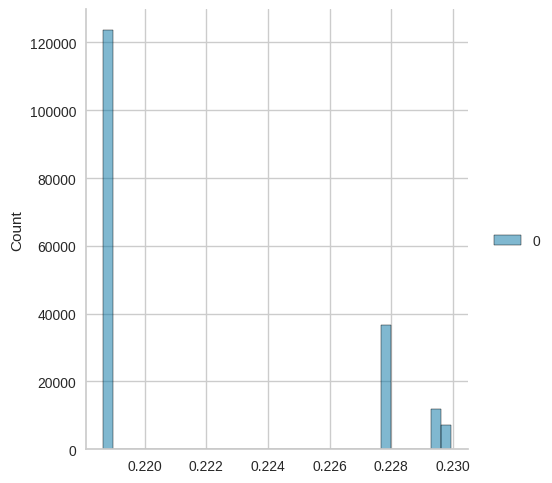

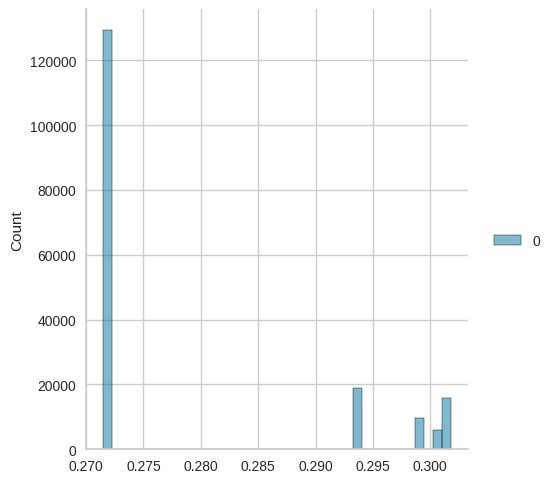

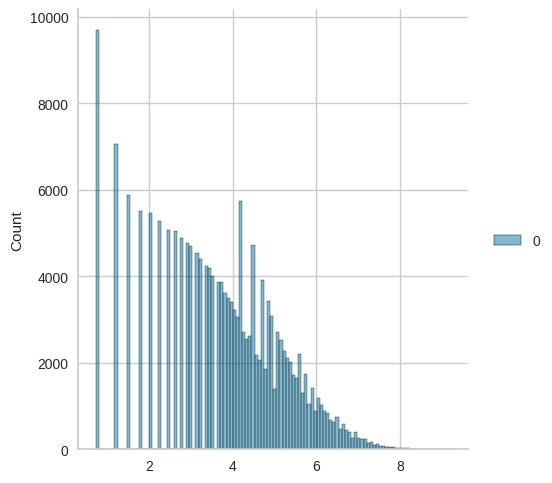

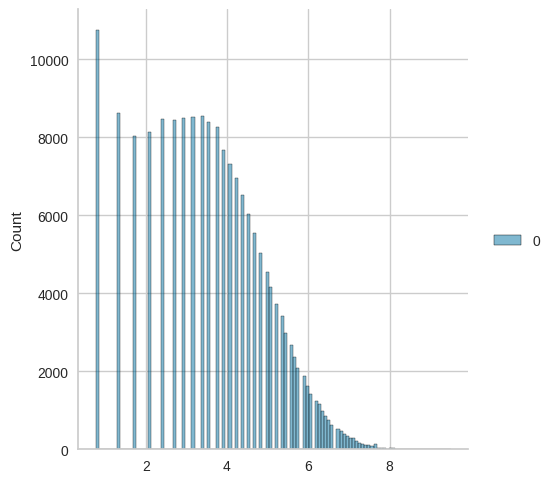

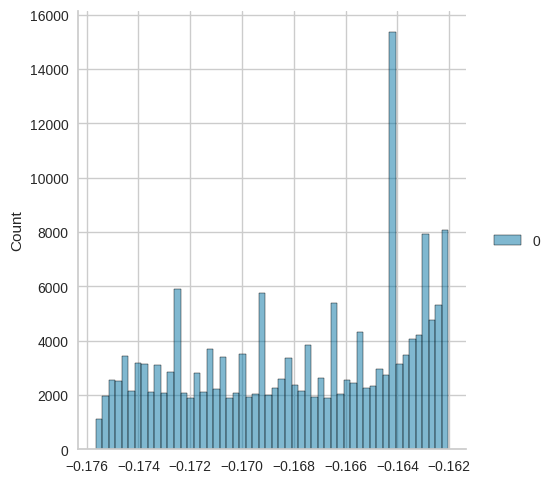

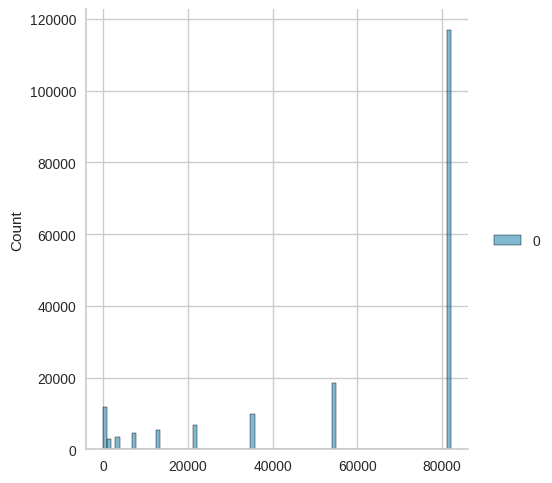

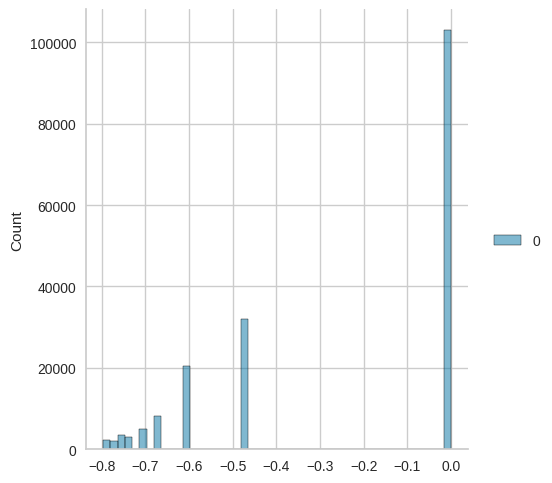

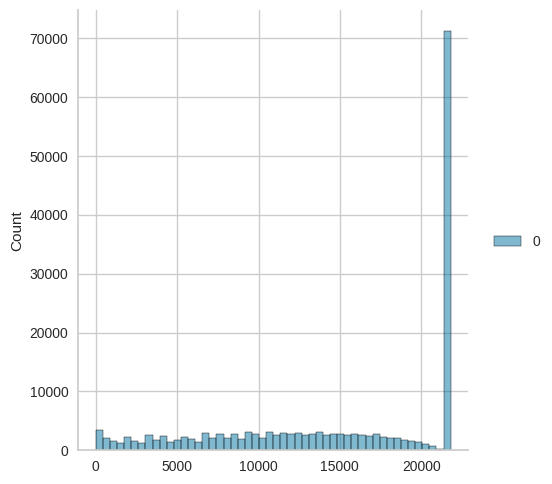

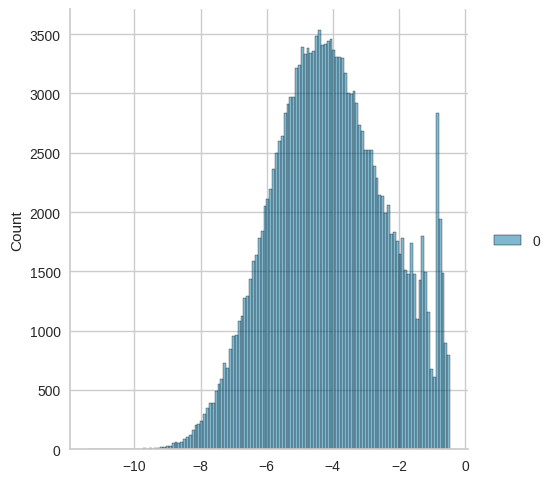

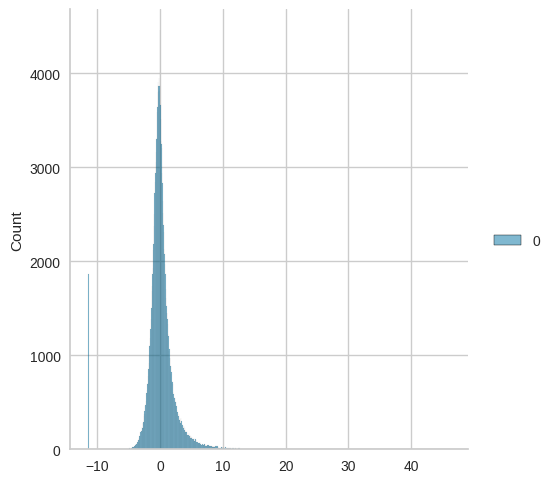

In [7]:
df_reduce_skewness = df.copy()
# iterate on the features that have skew ratio more than 1 or -1 and call the remove_skewness function
for col in cal_skewnwss[(cal_skewnwss['skew'] >=1) | (cal_skewnwss['skew'] <= - 1) ].index.tolist():
    if (col == 'first_active_month_year_min') |  (col == 'purchase_date_max' ):
        df_reduce_skewness[col] = df_reduce_skewness[col]    
    else:
        df_reduce_skewness[col] = remove_skewness(df_reduce_skewness[col])

In [8]:
df_reduce_skewness.skew()

/tmp/ipykernel_32/438414585.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_reduce_skewness.skew()


authorized_flag_mean           -0.578070
authorized_flag_sum            -0.016233
category_2_mean                 0.731931
category_2_sum                 -0.004808
category_3_sum                 -0.018432
category_3_mean                 0.131108
category_4_sum                  0.078397
category_4_mean                 0.014403
merchant_id_nunique            -0.029897
purchase_amount_sum             0.020539
purchase_amount_mean            0.844942
purchase_amount_max            -0.272996
purchase_amount_min             0.679216
installments_sum                0.204532
installments_mean               0.131108
installments_max                0.155724
installments_min                0.155072
purchase_month_mean            -0.026557
purchase_month_max             -1.128061
purchase_month_min              1.049518
purchase_date_ptp               0.008832
purchase_date_max              -1.703611
purchase_date_min               0.291836
month_lag_min                  -0.024264
month_lag_max   

### Robust Scaling 
----------
-----------

In [8]:
# Drop card_id  and score 
X_pt = df_reduce_skewness.drop(['card_id' , 'score_min'] , axis = 1)

,authorized_flag_mean,authorized_flag_sum,category_2_mean,category_2_sum,category_3_sum,category_3_mean,category_4_sum,category_4_mean,merchant_id_nunique,purchase_amount_sum,purchase_amount_mean,purchase_amount_max,purchase_amount_min,installments_sum,installments_mean,installments_max,installments_min,purchase_month_mean,purchase_month_max,purchase_month_min,purchase_date_ptp,purchase_date_max,purchase_date_min,month_lag_min,month_lag_max,merchant_category_id_nunique,state_id_nunique,subsector_id_nunique,city_id_nunique,feature_1_min,feature_2_min,feature_3_min,first_active_month_month_min,first_active_month_year_min
count,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000
mean,-0.124564,-0.019228,0.583108,-0.014880,-0.025508,-0.424848,0.004712,-0.001980,-0.039024,0.026464,0.107675,-0.061431,0.167800,0.107197,-0.424848,-0.043341,0.494368,-0.026015,-0.719335,0.330625,0.051321,-0.372882,0.034727,-0.009354,-0.531078,-0.042071,0.328862,0.099330,0.029125,0.052737,-0.258808,-0.432298,-0.124788,-0.486483
std,0.565397,0.700087,0.738234,0.729613,0.711294,0.536009,0.595686,0.447885,0.722488,0.702382,0.755372,0.566870,0.670010,0.479757,0.536009,0.397163,0.511672,0.801617,1.090121,0.536158,0.615076,0.966606,0.526270,0.587172,0.634405,0.711394,0.491122,0.699268,0.466606,0.592789,0.750362,0.495397,0.668964,0.783324
min,-1.328089,-1.656546,-0.027907,-1.603870,-1.529914,-0.964741,-0.764286,-0.509246,-1.414189,-2.948887,-1.474245,-1.153581,-0.808923,-0.418612,-0.964741,-0.500000,0.000000,-2.028896,-3.010904,0.000000,-1.045973,-4.557545,-0.616654,-0.857143,-1.698927,-1.384848,0.000000,-1.000000,-0.530319,-1.000000,-1.000000,-1.000000,-1.400000,-6.000000
25%,-0.577798,-0.516631,-0.027907,-0.510814,-0.523811,-0.964741,-0.474258,-0.502198,-0.524371,-0.474129,-0.453008,-0.559532,-0.380043,-0.418612,-0.964741,-0.500000,0.000000,-0.517068,-1.000000,0.000000,-0.413023,-0.679819,-0.506369,-0.571429,-1.000000,-0.500871,0.000000,-0.428571,-0.530319,-0.500000,-1.000000,-1.000000,-0.600000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.422202,0.483369,0.972093,0.489186,0.476189,0.035259,0.525742,0.497802,0.475629,0.525871,0.546992,0.440468,0.619957,0.581388,0.035259,0.500000,1.000000,0.482932,0.000000,1.000000,0.586977,0.320181,0.493631,0.428571,0.000000,0.499129,1.000000,0.571429,0.469681,0.500000,0.000000,0.000000,0.400000,0.000000
max,0.422202,2.873655,1.972093,2.506742,2.712047,1.008593,1.564380,0.509246,2.595124,1.485184,3.351099,0.734889,1.596890,1.088782,1.008593,0.500000,2.000000,2.203801,0.000000,1.350451,1.115076,0.446836,1.365066,1.285714,0.000000,2.661932,1.206904,3.000000,1.277274,1.000000,1.000000,0.000000,0.800000,1.000000


array([[<Axes: title={'center': 'authorized_flag_mean'}>,
        <Axes: title={'center': 'authorized_flag_sum'}>,
        <Axes: title={'center': 'category_2_mean'}>,
        <Axes: title={'center': 'category_2_sum'}>,
        <Axes: title={'center': 'category_3_sum'}>,
        <Axes: title={'center': 'category_3_mean'}>],
       [<Axes: title={'center': 'category_4_sum'}>,
        <Axes: title={'center': 'category_4_mean'}>,
        <Axes: title={'center': 'merchant_id_nunique'}>,
        <Axes: title={'center': 'purchase_amount_sum'}>,
        <Axes: title={'center': 'purchase_amount_mean'}>,
        <Axes: title={'center': 'purchase_amount_max'}>],
       [<Axes: title={'center': 'purchase_amount_min'}>,
        <Axes: title={'center': 'installments_sum'}>,
        <Axes: title={'center': 'installments_mean'}>,
        <Axes: title={'center': 'installments_max'}>,
        <Axes: title={'center': 'installments_min'}>,
        <Axes: title={'center': 'purchase_month_mean'}>],
       

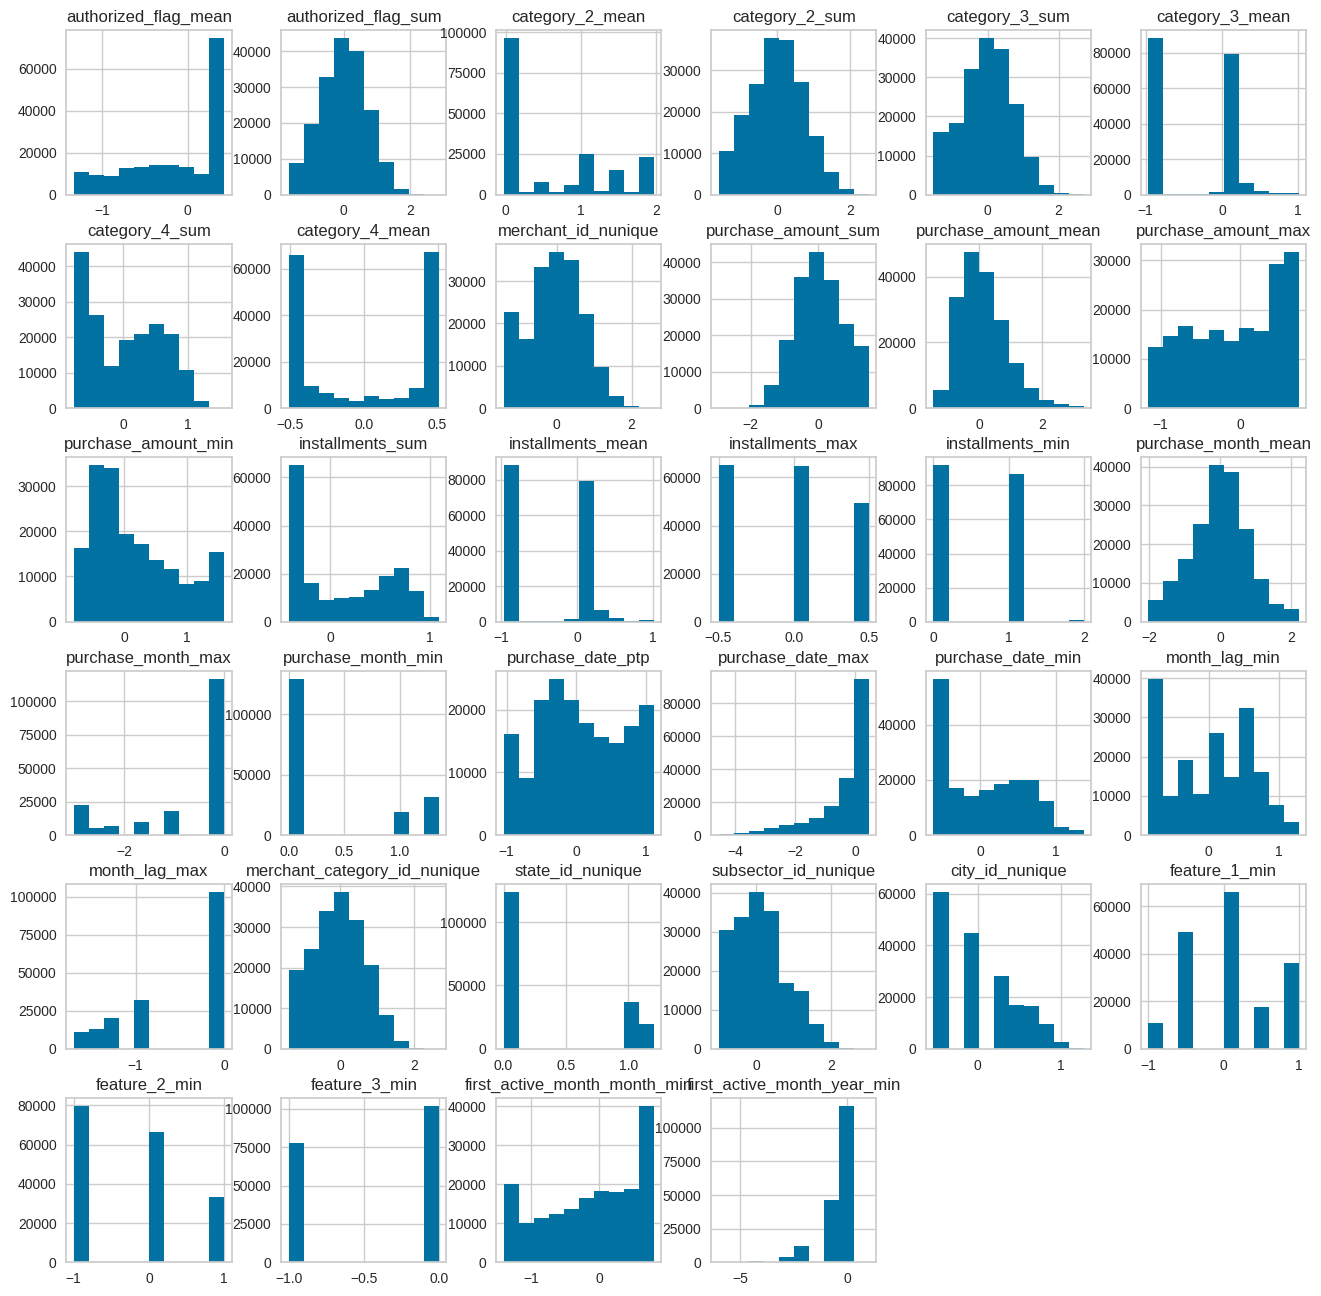

In [9]:
# Apply robust scaler 
transformer_pt = RobustScaler().fit_transform(X_pt)

feat_scaled_robust_pt = pd.DataFrame(transformer_pt)
feat_scaled_robust_pt.columns = X_pt.columns.tolist()
feat_scaled_robust_pt.describe()
feat_scaled_robust_pt.hist(figsize = (16 , 16 ))

In [13]:
feat_scaled_robust_pt.skew()

authorized_flag_mean           -0.578070
authorized_flag_sum            -0.016233
category_2_mean                 0.731931
category_2_sum                 -0.004808
category_3_sum                 -0.018432
category_3_mean                 0.131108
category_4_sum                  0.078397
category_4_mean                 0.014403
merchant_id_nunique            -0.029897
purchase_amount_sum             0.020539
purchase_amount_mean            0.844942
purchase_amount_max            -0.272996
purchase_amount_min             0.679216
installments_sum                0.204532
installments_mean               0.131108
installments_max                0.155724
installments_min                0.155072
purchase_month_mean            -0.026557
purchase_month_max             -1.128061
purchase_month_min              1.049518
purchase_date_ptp               0.008832
purchase_date_max              -1.703611
purchase_date_min               0.291836
month_lag_min                  -0.024264
month_lag_max   

# 2nd Technique
---------
--------

In [10]:
# Drop card_id  and score 
X = df.drop(['card_id' , 'score_min'] , axis = 1)

##  Robust Scaler 
----
-------

,authorized_flag_mean,authorized_flag_sum,category_2_mean,category_2_sum,category_3_sum,category_3_mean,category_4_sum,category_4_mean,merchant_id_nunique,purchase_amount_sum,purchase_amount_mean,purchase_amount_max,purchase_amount_min,installments_sum,installments_mean,installments_max,installments_min,purchase_month_mean,purchase_month_max,purchase_month_min,purchase_date_ptp,purchase_date_max,purchase_date_min,month_lag_min,month_lag_max,merchant_category_id_nunique,state_id_nunique,subsector_id_nunique,city_id_nunique,feature_1_min,feature_2_min,feature_3_min,first_active_month_month_min,first_active_month_year_min
count,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000,179589.000000
mean,-0.402739,0.446971,0.583108,0.631757,0.433028,-0.424848,0.766490,-0.001980,0.264140,-0.445255,0.107675,-0.260820,0.585696,0.845594,-0.424848,-0.043341,0.494368,-0.026015,-1.383208,0.921604,0.051321,-0.372882,0.034727,-0.009354,-1.115046,0.126313,0.487251,0.099330,0.280116,0.052737,-0.258808,-0.432298,-0.124788,-0.486483
std,1.188694,1.295457,0.738234,1.925603,1.293247,0.536009,1.899983,0.447885,0.939539,1.303337,0.755372,0.750846,1.656697,1.951339,0.536009,0.397163,0.511672,0.801617,2.598861,2.109081,0.615076,0.966606,0.526270,0.587172,2.045385,0.740778,0.919149,0.699268,0.816785,0.592789,0.750362,0.495397,0.668964,0.783324
min,-10.919118,-0.491228,-0.027907,-0.438596,-0.505882,-0.964741,-0.181818,-0.509246,-0.653846,-46.567196,-1.474245,-2.799289,-0.589829,-0.076923,-0.964741,-0.500000,0.000000,-2.028896,-11.000000,0.000000,-1.045973,-4.557545,-0.616654,-0.857143,-15.000000,-0.833333,0.000000,-1.000000,-0.333333,-1.000000,-1.000000,-1.000000,-1.400000,-6.000000
25%,-0.669118,-0.315789,-0.027907,-0.289474,-0.329412,-0.964741,-0.151515,-0.502198,-0.384615,-0.677354,-0.453008,-0.671815,-0.305991,-0.076923,-0.964741,-0.500000,0.000000,-0.517068,-1.000000,0.000000,-0.413023,-0.679819,-0.506369,-0.571429,-1.000000,-0.416667,0.000000,-0.428571,-0.333333,-0.500000,-1.000000,-1.000000,-0.600000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.330882,0.684211,0.972093,0.710526,0.670588,0.035259,0.848485,0.497802,0.615385,0.322646,0.546992,0.328185,0.694009,0.923077,0.035259,0.500000,1.000000,0.482932,0.000000,1.000000,0.586977,0.320181,0.493631,0.428571,0.000000,0.583333,1.000000,0.571429,0.666667,0.500000,0.000000,0.000000,0.400000,0.000000
max,0.330882,43.543860,1.972093,43.938596,29.247059,1.008593,76.484848,0.509246,11.269231,0.483301,3.351099,0.498158,11.482177,39.615385,1.008593,0.500000,2.000000,2.203801,0.000000,11.000000,1.115076,0.446836,1.365066,1.285714,0.000000,5.833333,18.000000,3.000000,16.000000,1.000000,1.000000,0.000000,0.800000,1.000000


array([[<Axes: title={'center': 'authorized_flag_mean'}>,
        <Axes: title={'center': 'authorized_flag_sum'}>,
        <Axes: title={'center': 'category_2_mean'}>,
        <Axes: title={'center': 'category_2_sum'}>,
        <Axes: title={'center': 'category_3_sum'}>,
        <Axes: title={'center': 'category_3_mean'}>],
       [<Axes: title={'center': 'category_4_sum'}>,
        <Axes: title={'center': 'category_4_mean'}>,
        <Axes: title={'center': 'merchant_id_nunique'}>,
        <Axes: title={'center': 'purchase_amount_sum'}>,
        <Axes: title={'center': 'purchase_amount_mean'}>,
        <Axes: title={'center': 'purchase_amount_max'}>],
       [<Axes: title={'center': 'purchase_amount_min'}>,
        <Axes: title={'center': 'installments_sum'}>,
        <Axes: title={'center': 'installments_mean'}>,
        <Axes: title={'center': 'installments_max'}>,
        <Axes: title={'center': 'installments_min'}>,
        <Axes: title={'center': 'purchase_month_mean'}>],
       

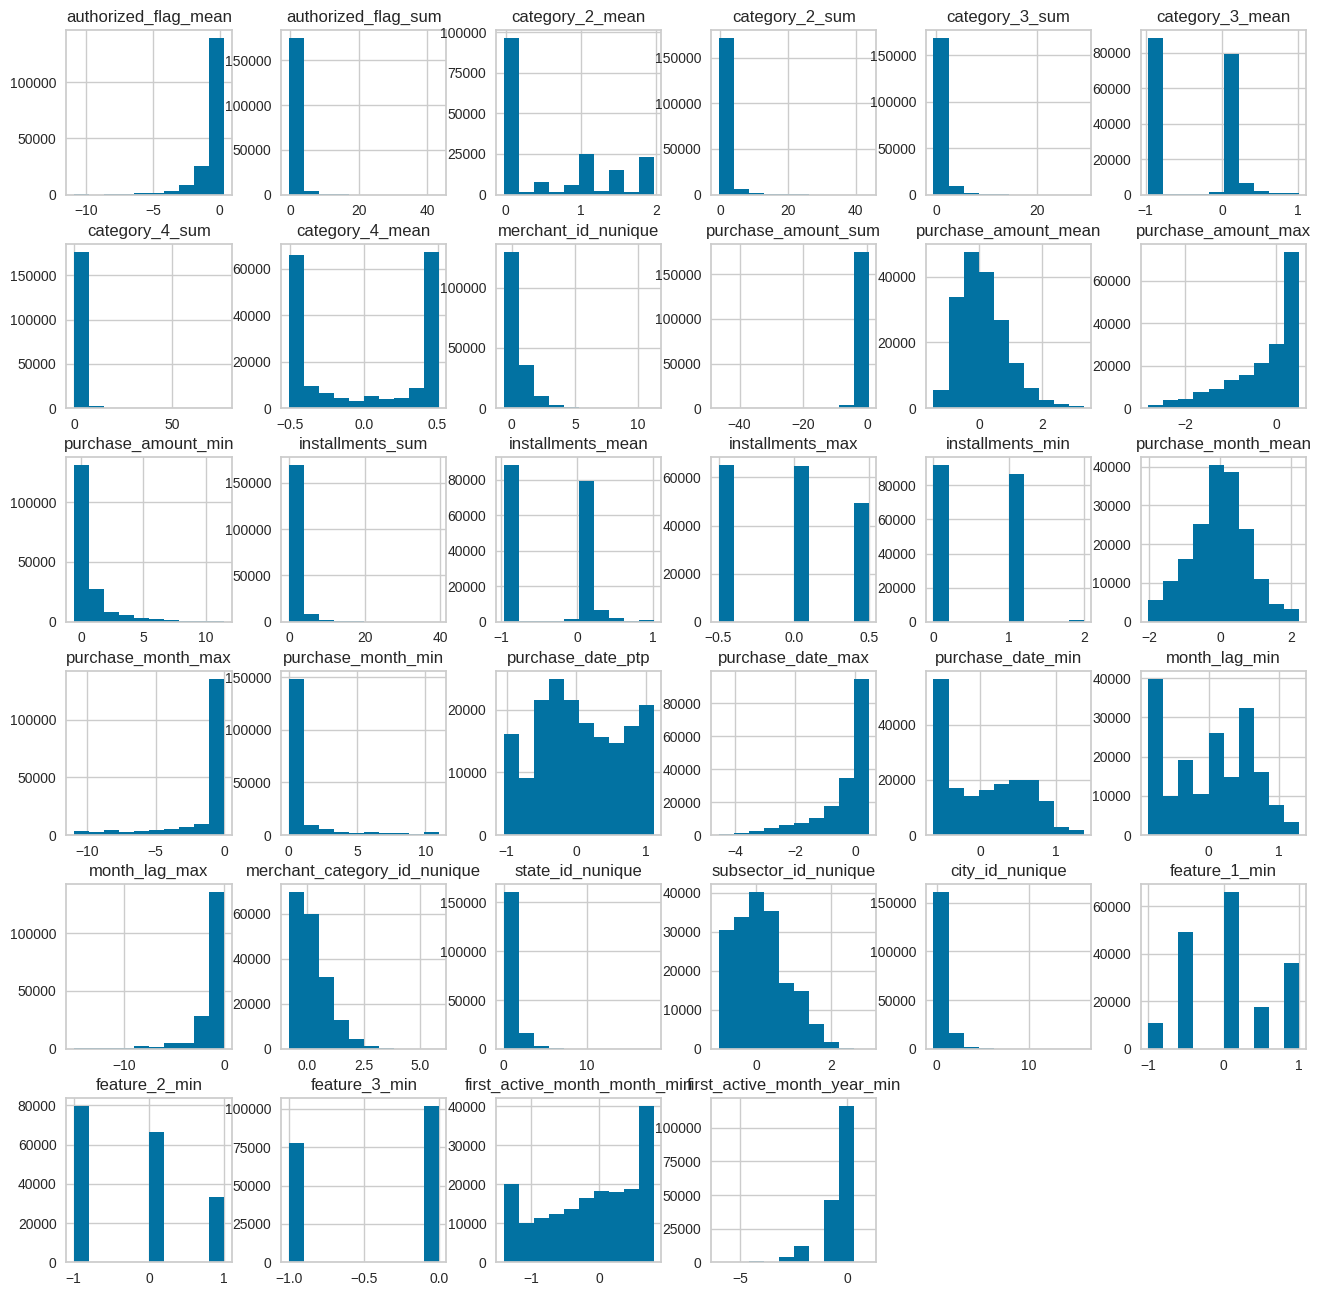

In [11]:
# Apply robust scaler 
transformer = RobustScaler().fit_transform(X)
feat_scaled_robust = pd.DataFrame(transformer)
feat_scaled_robust.columns = X.columns.tolist()
feat_scaled_robust.describe()
feat_scaled_robust.hist(figsize = (16 , 16 ))

In [16]:
feat_scaled_robust.skew()

authorized_flag_mean           -3.755653
authorized_flag_sum             3.714263
category_2_mean                 0.731931
category_2_sum                  5.230001
category_3_sum                  3.659123
category_3_mean                 0.131108
category_4_sum                  4.836873
category_4_mean                 0.014403
merchant_id_nunique             2.097459
purchase_amount_sum            -3.814082
purchase_amount_mean            0.844942
purchase_amount_max            -1.139905
purchase_amount_min             3.143122
installments_sum                4.475929
installments_mean               0.131108
installments_max                0.155724
installments_min                0.155072
purchase_month_mean            -0.026557
purchase_month_max             -2.080083
purchase_month_min              2.913721
purchase_date_ptp               0.008832
purchase_date_max              -1.703611
purchase_date_min               0.291836
month_lag_min                  -0.024264
month_lag_max   

# Helper Function
----------
----------

In [12]:
#--------------------
def best_k(features):
    model = KMeans(random_state=7777777)
    visualizer_silhouette= KElbowVisualizer(model,metric='silhouette', k=(2,10), timings= True)
    visualizer_silhouette.fit(features)        # Fit data to visualizer
    visualizer_silhouette.show()  
    # k is range of number of clusters.
    visualizer_elbow = KElbowVisualizer(model, k=(2,10), timings= True)
    visualizer_elbow.fit(features)        # Fit the data to the visualizer
    visualizer_elbow.show()  

def fit_kmeans(num_cluster ,features ):
    model_kmeans= KMeans(n_clusters=num_cluster, random_state=7777777)
    ykmeans=  model_kmeans.fit_predict(features)
    return model_kmeans , ykmeans

def visulaize_cluster(features , ymeans ,model_kmeans , indx_feature_1 , indx_feature_2):
    plt.scatter(features.iloc[:, indx_feature_1], features.iloc[:,indx_feature_2], c=model_kmeans.labels_, s = 10 , cmap='rainbow')
    plt.scatter(model_kmeans.cluster_centers_[:,indx_feature_1],model_kmeans.cluster_centers_[:,indx_feature_2], s= 100, c="yellow", label = "Centroids")
    plt.title("Clusters of Clients")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

    
def evaluate_cluster(df ,  model_kmeans ):
    labels = model_kmeans.labels_
    # Calculate the silhouette score
    silhouette_score_ = silhouette_score(df, labels)

    # Calculate the within-cluster SSE
    within_cluster_sse = model_kmeans.inertia_

    # Print the results
    print('Silhouette score:', silhouette_score_)
    print('Within-cluster SSE:', within_cluster_sse)
    
    return silhouette_score_ , within_cluster_sse 


def TSNE_plot(features , model_kmean):
    tsne = TSNE(n_components=2, random_state= 77 )
    X_tsne = tsne.fit_transform(features)
    # Plot the t-SNE results
    plt.figure(figsize=(8, 6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=model_kmean.labels_ , cmap='viridis')
    plt.colorbar()
    plt.title(' Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# kmeans 
--------
-----------

Apply Kmeans on both techniques

## 1st technique (apply powertransformation)
--------
---------

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kme

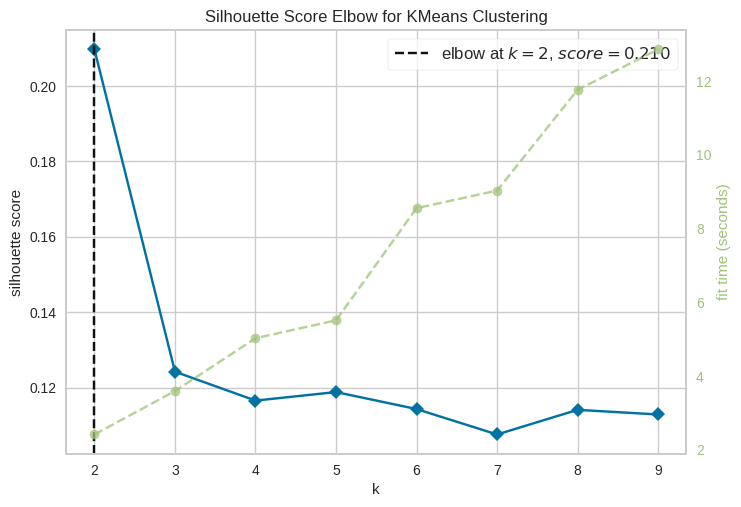

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kme

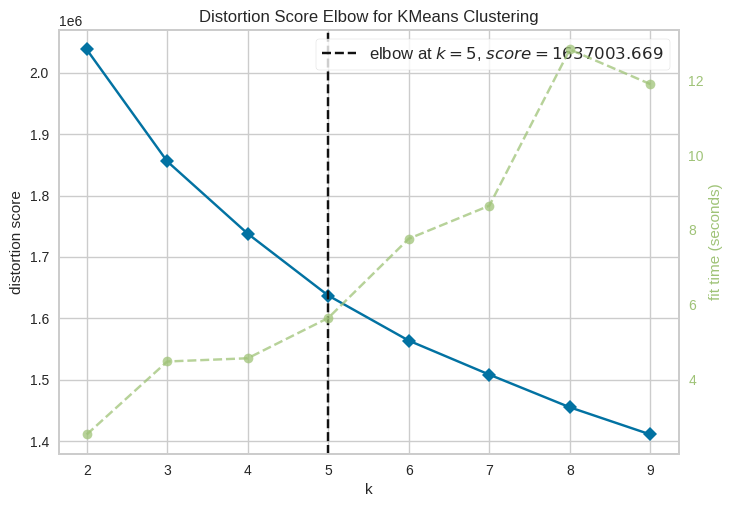

In [16]:
# with applying powertransformation
best_k(feat_scaled_robust_pt)

In [14]:
model_kmeans_pt , ykmeans_pt = fit_kmeans(2 ,feat_scaled_robust_pt )

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
# Add cluster column to the main datasets to interpet the meaning of each cluster
feat_scaled_robust_pt['cluster'] = ykmeans_pt
feat_scaled_robust_pt

# Select cluster 0  and print the summary for its feature
feat_scaled_robust_pt[feat_scaled_robust_pt['cluster'] == 0].describe()
feat_scaled_robust_pt[feat_scaled_robust_pt['cluster'] == 1].describe()

,authorized_flag_mean,authorized_flag_sum,category_2_mean,category_2_sum,category_3_sum,category_3_mean,category_4_sum,category_4_mean,merchant_id_nunique,purchase_amount_sum,purchase_amount_mean,purchase_amount_max,purchase_amount_min,installments_sum,installments_mean,installments_max,installments_min,purchase_month_mean,purchase_month_max,purchase_month_min,purchase_date_ptp,purchase_date_max,purchase_date_min,month_lag_min,month_lag_max,merchant_category_id_nunique,state_id_nunique,subsector_id_nunique,city_id_nunique,feature_1_min,feature_2_min,feature_3_min,first_active_month_month_min,first_active_month_year_min,cluster
0,-1.250232,-0.565600,0.972093,-0.134458,-0.280432,0.021926,0.237183,0.509246,-0.524371,0.505784,1.092454,0.572257,0.841496,0.436719,0.021926,0.0,1.0,-0.312138,-1.000000,1.000000,0.277774,0.162695,0.039169,-0.142857,0.000000,-0.384547,0.000000,-0.142857,-0.530319,1.0,-1.0,0.0,-1.2,0.0,1
1,-0.549640,0.232938,0.972093,0.523760,0.047981,-0.943748,0.619042,0.509246,0.208168,-0.271024,-0.423545,0.440468,-0.269948,-0.142544,-0.943748,0.0,0.0,0.206164,0.000000,0.000000,0.878142,0.037997,-0.560754,-0.857143,-1.000000,0.304016,0.000000,0.428571,-0.530319,-0.5,0.0,-1.0,-0.2,-1.0,0
2,-0.014994,0.687114,0.972093,0.914019,0.928735,0.162878,0.821733,0.509246,0.857309,-0.651669,0.018717,0.457693,-0.089368,0.831302,0.162878,0.5,1.0,0.271995,0.000000,0.000000,0.122493,0.401157,0.275999,0.142857,0.000000,0.883478,0.000000,1.000000,-0.530319,0.5,-1.0,-1.0,0.2,0.0,0
3,-1.312452,-0.150735,0.972093,0.412621,-0.079827,-0.964741,-0.764286,-0.509246,-0.389389,-0.222829,-1.351209,-1.130269,-0.711737,-0.418612,-0.964741,-0.5,0.0,0.492495,0.000000,0.000000,0.010663,-0.600624,-0.018180,-0.142857,-1.295002,-0.500871,0.000000,-0.428571,-0.530319,0.0,-1.0,0.0,-0.6,0.0,0
4,-0.802234,0.305706,-0.027907,0.047276,0.134075,-0.964741,0.630880,0.381935,0.498653,-0.333802,-0.004418,0.356533,-0.040680,-0.418612,-0.964741,-0.5,0.0,0.492857,0.000000,0.000000,0.481552,0.058417,-0.188992,-0.285714,0.000000,0.499129,0.000000,0.142857,0.287104,0.0,0.0,0.0,-0.8,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179584,-0.048390,0.018695,-0.027907,-0.264176,0.182438,0.054815,0.468728,0.441347,0.038245,0.002858,-0.011482,0.167837,-0.089368,0.615446,0.054815,0.5,1.0,-0.284512,-1.000000,0.000000,0.651454,0.411963,-0.204781,-0.428571,0.000000,0.000000,0.000000,-0.285714,0.000000,-0.5,-1.0,-1.0,-0.8,0.0,0
179585,0.302711,0.879588,1.335729,1.192781,1.096154,0.081724,0.857156,0.354929,1.469650,-0.815682,0.157208,0.440468,-0.244808,0.863230,0.081724,0.5,0.0,-0.994042,0.000000,0.000000,-0.447443,0.445307,0.816118,0.714286,0.000000,1.324223,1.204052,1.571429,0.911959,0.5,1.0,-1.0,0.6,0.0,0
179586,-0.638759,0.540771,-0.027907,0.242019,0.374067,-0.928643,0.382938,-0.248413,0.703246,-0.600060,-0.596239,-0.012605,-0.180891,0.093502,-0.928643,0.0,0.0,0.580172,0.000000,0.000000,-0.043825,0.027541,0.280553,0.142857,-1.000000,0.728735,0.000000,0.714286,0.469681,-0.5,0.0,-1.0,0.0,0.0,0
179587,0.422202,-0.516631,0.272093,-0.566396,-0.365903,0.219259,-0.313991,-0.305548,-0.454017,0.570173,0.389170,-0.605300,0.841496,0.419006,0.219259,0.5,1.0,0.895513,0.000000,0.000000,1.007914,0.422239,-0.527587,-0.857143,0.000000,-0.384547,1.147729,-0.142857,0.469681,-0.5,-1.0,-1.0,-1.4,-2.0,0


,authorized_flag_mean,authorized_flag_sum,category_2_mean,category_2_sum,category_3_sum,category_3_mean,category_4_sum,category_4_mean,merchant_id_nunique,purchase_amount_sum,purchase_amount_mean,purchase_amount_max,purchase_amount_min,installments_sum,installments_mean,installments_max,installments_min,purchase_month_mean,purchase_month_max,purchase_month_min,purchase_date_ptp,purchase_date_max,purchase_date_min,month_lag_min,month_lag_max,merchant_category_id_nunique,state_id_nunique,subsector_id_nunique,city_id_nunique,feature_1_min,feature_2_min,feature_3_min,first_active_month_month_min,first_active_month_year_min,cluster
count,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.000000,111381.0
mean,-0.212454,0.400637,0.566529,0.387241,0.386286,-0.494675,0.228132,0.036249,0.392390,-0.395879,-0.049260,0.108865,-0.140277,0.169226,-0.494675,-0.027572,0.429337,0.055159,-0.226904,0.126950,0.310899,-0.022791,-0.064663,-0.177872,-0.314908,0.377566,0.423626,0.493781,0.179231,0.027276,-0.252081,-0.431465,-0.136526,-0.486169,0.0
std,0.499689,0.469224,0.733637,0.527223,0.494584,0.511457,0.582597,0.440529,0.484820,0.467669,0.592209,0.502032,0.438142,0.524321,0.511457,0.405147,0.494984,0.602334,0.609746,0.358635,0.514680,0.584748,0.484603,0.544476,0.515542,0.483490,0.523082,0.549086,0.454842,0.583860,0.736422,0.495283,0.666880,0.775917,0.0
min,-1.328035,-0.912275,-0.027907,-0.829271,-0.899852,-0.964741,-0.764286,-0.509246,-1.414189,-2.948887,-1.361275,-1.138552,-0.808923,-0.418612,-0.964741,-0.500000,0.000000,-1.975821,-3.009292,0.000000,-1.015390,-3.601428,-0.616654,-0.857143,-1.673400,-1.384848,0.000000,-1.000000,-0.530319,-1.000000,-1.000000,-1.000000,-1.400000,-6.000000,0.0
25%,-0.592438,0.036818,-0.027907,-0.009984,0.024456,-0.964741,-0.313991,-0.464964,0.038245,-0.701303,-0.500734,-0.258236,-0.476001,-0.418612,-0.964741,-0.500000,0.000000,-0.312138,0.000000,0.000000,-0.145441,-0.200205,-0.556269,-0.714286,-1.000000,0.000000,0.000000,0.142857,0.000000,-0.500000,-1.000000,-1.000000,-0.600000,-1.000000,0.0
50%,-0.182064,0.349823,-0.002266,0.339317,0.345832,-0.935288,0.396908,0.168636,0.351383,-0.347954,-0.115683,0.260489,-0.244808,0.093502,-0.935288,0.000000,0.000000,0.059967,0.000000,0.000000,0.310287,0.198284,-0.152879,-0.142857,0.000000,0.371651,0.000000,0.428571,0.287104,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.245265,0.705530,0.972093,0.734187,0.708539,0.038370,0.692441,0.490209,0.703246,-0.036855,0.332579,0.531866,0.096668,0.695322,0.038370,0.500000,1.000000,0.454016,0.000000,0.000000,0.795074,0.371417,0.374902,0.285714,0.000000,0.674081,1.000000,0.857143,0.469681,0.500000,0.000000,0.000000,0.400000,0.000000,0.0
max,0.422202,2.873655,1.972093,2.506742,2.712047,0.908254,1.564380,0.509246,2.595124,0.736680,2.705468,0.734889,1.589348,1.088782,0.908254,0.500000,1.000000,2.203801,0.000000,1.350451,1.115076,0.446836,1.043264,1.285714,0.000000,2.661932,1.206904,3.000000,1.277274,1.000000,1.000000,0.000000,0.800000,1.000000,0.0


,authorized_flag_mean,authorized_flag_sum,category_2_mean,category_2_sum,category_3_sum,category_3_mean,category_4_sum,category_4_mean,merchant_id_nunique,purchase_amount_sum,purchase_amount_mean,purchase_amount_max,purchase_amount_min,installments_sum,installments_mean,installments_max,installments_min,purchase_month_mean,purchase_month_max,purchase_month_min,purchase_date_ptp,purchase_date_max,purchase_date_min,month_lag_min,month_lag_max,merchant_category_id_nunique,state_id_nunique,subsector_id_nunique,city_id_nunique,feature_1_min,feature_2_min,feature_3_min,first_active_month_month_min,first_active_month_year_min,cluster
count,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.000000,68208.0
mean,0.018959,-0.704851,0.610180,-0.671528,-0.697951,-0.310822,-0.360123,-0.064406,-0.743506,0.716134,0.363942,-0.339517,0.670879,0.005907,-0.310822,-0.069090,0.600560,-0.158569,-1.523457,0.663218,-0.372560,-0.944567,0.197028,0.265830,-0.884075,-0.727322,0.174116,-0.544794,-0.215993,0.094314,-0.269792,-0.433659,-0.105621,-0.486996,1.0
std,0.633047,0.415924,0.744894,0.502469,0.451201,0.555285,0.406708,0.452761,0.436266,0.418176,0.907608,0.556622,0.678544,0.374912,0.555285,0.382376,0.520635,1.034961,1.216231,0.607043,0.523289,1.172490,0.550702,0.549157,0.651739,0.440046,0.386860,0.355179,0.372219,0.604792,0.772465,0.495583,0.671918,0.795276,0.0
min,-1.328089,-1.656546,-0.027907,-1.603870,-1.529914,-0.964741,-0.764286,-0.509246,-1.414189,-0.930118,-1.474245,-1.153581,-0.807486,-0.418612,-0.964741,-0.500000,0.000000,-2.028896,-3.010904,0.000000,-1.045973,-4.557545,-0.616643,-0.857143,-1.698927,-1.384848,0.000000,-1.000000,-0.530319,-1.000000,-1.000000,-1.000000,-1.400000,-6.000000,1.0
25%,-0.485264,-1.020426,-0.027907,-1.078791,-1.036958,-0.964741,-0.764286,-0.509246,-1.029486,0.424483,-0.316192,-0.835401,0.096668,-0.418612,-0.964741,-0.500000,0.000000,-0.963322,-2.750828,0.000000,-0.795051,-1.699792,-0.339219,-0.142857,-1.431869,-1.135720,0.000000,-0.857143,-0.530319,-0.500000,-1.000000,-1.000000,-0.600000,-1.000000,1.0
50%,0.422202,-0.679004,0.063002,-0.699767,-0.700658,0.021926,-0.474258,-0.254623,-0.687671,0.697293,0.271521,-0.431153,0.744502,0.000000,0.021926,0.000000,1.000000,-0.209886,-1.714282,1.000000,-0.432358,-0.596489,0.222903,0.428571,-1.000000,-0.773296,0.000000,-0.571429,-0.530319,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,0.422202,-0.430028,0.972093,-0.315724,-0.365903,0.021926,0.000000,0.509246,-0.454017,1.041922,0.946883,0.125485,1.305662,0.353859,0.021926,0.000000,1.000000,0.587680,0.000000,1.288169,-0.039376,0.010289,0.673193,0.714286,0.000000,-0.384547,0.000000,-0.285714,0.000000,0.500000,0.000000,0.000000,0.400000,0.000000,1.0
max,0.422202,1.042792,1.972093,1.353711,0.984349,1.008593,0.857156,0.509246,0.841294,1.485184,3.351099,0.734889,1.596890,0.832604,1.008593,0.500000,2.000000,2.203801,0.000000,1.350451,1.111092,0.446774,1.365066,1.285714,0.000000,0.883478,1.205217,1.285714,1.130255,1.000000,1.000000,0.000000,0.800000,1.000000,1.0


**Q1 (30 points) Our goal is to cluster users based on their spending behaviors. Your task is to perform a clustering analysis leveraging the K-means
method and report your findings. You should specify how you select the
right ”K” for the k-means method, and  how you create features. Explain
the resultant clusters (the meaning of each cluster) and judge the quality
of resultant clusters.**

- Explain the resultant clusters (the meaning of each cluster) 
    - Cluster 0 is a group of data points that are characterized by the following:

        - They have a low authorized flag rate (-0.212454). This means that they are more likely to be unauthorized transactions.
        - They have a low category 2 mean (0.566529). This means that they are more likely to be for general merchandise.
        - They have a low category 3 sum (0.386286). This means that they are more likely to be for low-value items.
        - They have a low category 4 sum (0.228132). This means that they are more likely to be for single-item transactions.
        - They have a low merchant id nunique (0.036249). This means that they are more likely to be from a small number of merchants.
        - They have a low purchase amount mean (-0.049260). This means that they are more likely to be for low-value purchases.
        - They have a low purchase amount max (0.108865). This means that they are more likely to be for purchases under $10.
        - They have a low installments sum (0.169226). This means that they are more likely to be for single-installment transactions.
        - They have a low installments min (-0.494675). This means that they are more likely to be for no-installment transactions.
        - They have a low purchase month mean (-0.140277). This means that they are more likely to be for purchases in the early months of the year.
        - They have a low purchase month max (0.179231). This means that they are more likely to be for purchases in the first quarter of the year.
     Based on these characteristics, it is likely that cluster 0 contains data points that are associated with fraudulent transactions.Cluster 0 contains users who are not authorized to make purchases. 

    - Cluster 1 is a group of data points that are characterized by the following:
        - They have a high authorized flag rate (0.018959). This means that they are more likely to be authorized transactions.
        - They have a high category 2 mean (0.610180). This means that they are more likely to be for travel and entertainment.
        - They have a high category 3 mean (-0.310822). This means that they are more likely to be for high-value items.
        - They have a high category 4 mean (-0.360123). This means that they are more likely to be for multiple-item transactions.
        - They have a high merchant id nunique (68208.000000). This means that they are more likely to be from a large number of merchants.
        - They have a high purchase amount mean (0.363942). This means that they are more likely to be for high-value purchases.
        - They have a high purchase amount max (1.564380). This means that they are more likely to be for purchases over $100.
        - They have a high installments mean (0.265830). This means that they are more likely to be for multiple-installment transactions.
        - They have a high installments max (1.589348). This means that they are more likely to be for purchases that are paid off over a period of months.
        - They have a high purchase month mean (-0.215993). This means that they are more likely to be for purchases in the later months of the year.
        - They have a high purchase month max (0.174116). This means that they are more likely to be for purchases in the fourth quarter of the year.

    Based on these characteristics, it is likely that cluster 1 contains data points that are associated with legitimate transactions.Cluster 1 contains users who are authorized to make purchases. 

In [18]:
evaluate_cluster(feat_scaled_robust_pt ,  model_kmeans_pt )

Silhouette score: 0.20966982827837002

Within-cluster SSE: 2038003.1174518047


(0.20966982827837002, 2038003.1174518047)

**Q1 (30 points) Our goal is to cluster users based on their spending behaviors. Your task is to perform a clustering analysis leveraging the K-means
method and report your findings. You should specify how you select the
right ”K” for the k-means method, and  how you create features. Explain
the resultant clusters (the meaning of each cluster) and judge the quality
of resultant clusters.**

- judge the quality of resultant clusters
    - The quality of the resultant cluster can be judged by the following:

        - Silhouette score: The silhouette score is a measure of how well each data point is clustered. A score of 1 indicates that the data point is perfectly clustered, while a score of -1 indicates that the data point is misclassified. A score of 0 indicates that the data point is on the boundary between two clusters. The silhouette score for the resultant cluster is 0.20966982827837002, which indicates that the clusters are not perfectly separated.
        - Within-cluster SSE: The within-cluster SSE is a measure of the average distance between each data point and the center of its cluster. A lower SSE indicates that the data points are more tightly clustered together. The within-cluster SSE for the resultant cluster is 2038003.1174518047, which indicates that the clusters are not very tightly clustered together.
        
 Based on these two measures, the quality of the resultant cluster is not very good. The clusters are not perfectly separated, and the data points are not very tightly clustered together. This could be due to a number of factors, such as the quality of the data, the number of clusters, or the clustering algorithm used.

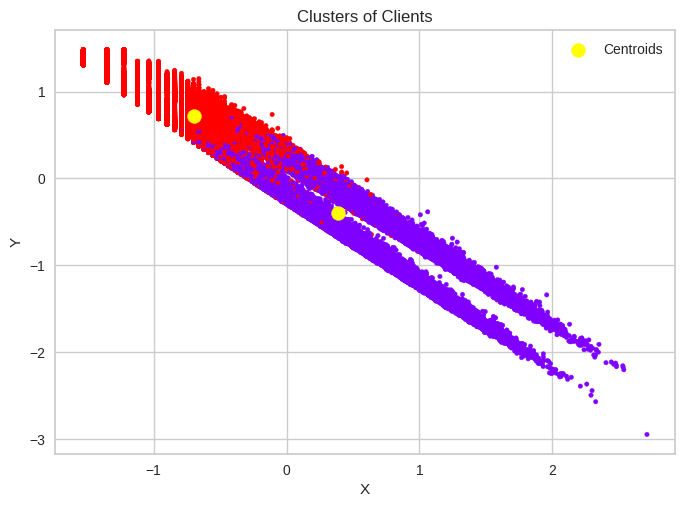

In [29]:
visulaize_cluster(feat_scaled_robust_pt , ykmeans_pt ,model_kmeans_pt  ,4,9)

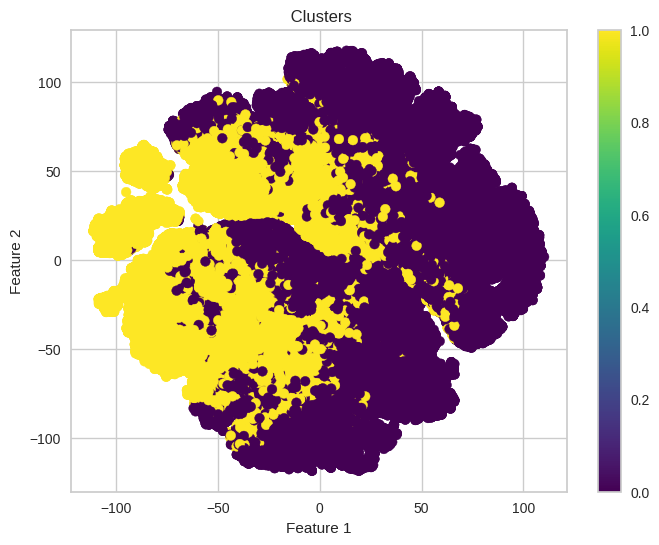

In [20]:

TSNE_plot (feat_scaled_robust_pt ,model_kmeans_pt )

## 2nd technique (without apply powertransformation)
--------
---------

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kme

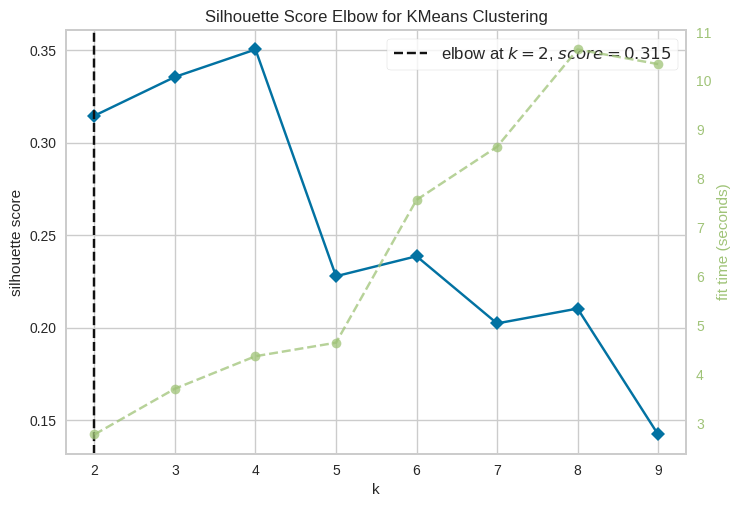

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kme

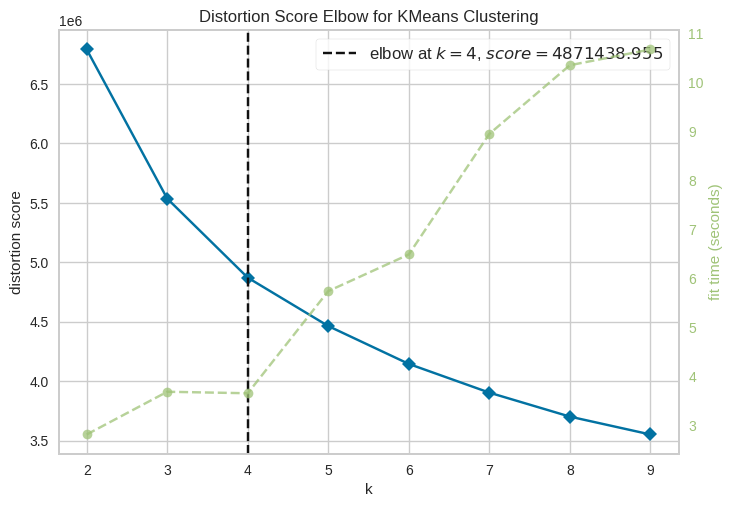

In [21]:
# without applying powertransformation
best_k(feat_scaled_robust)

In [36]:
model_kmeans , ykmeans = fit_kmeans(4 ,feat_scaled_robust )

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
# Add cluster column to the main datasets to interpet the meaning of each cluster
feat_scaled_robust['cluster'] = ykmeans
feat_scaled_robust

,authorized_flag_mean,authorized_flag_sum,category_2_mean,category_2_sum,category_3_sum,category_3_mean,category_4_sum,category_4_mean,merchant_id_nunique,purchase_amount_sum,purchase_amount_mean,purchase_amount_max,purchase_amount_min,installments_sum,installments_mean,installments_max,installments_min,purchase_month_mean,purchase_month_max,purchase_month_min,purchase_date_ptp,purchase_date_max,purchase_date_min,month_lag_min,month_lag_max,merchant_category_id_nunique,state_id_nunique,subsector_id_nunique,city_id_nunique,feature_1_min,feature_2_min,feature_3_min,first_active_month_month_min,first_active_month_year_min,cluster
0,-3.130656,-0.333333,0.972093,-0.105263,-0.211765,0.021926,0.212121,0.509246,-0.384615,0.315102,1.092454,0.408073,1.051574,0.423077,0.021926,0.0,1.0,-0.312138,-1.0,1.0,0.277774,0.162695,0.039169,-0.142857,0.0,-0.333333,0.0,-0.142857,-0.333333,1.0,-1.0,0.0,-1.2,0.0,1
1,-0.626564,0.263158,0.972093,0.789474,0.047059,-0.943748,1.242424,0.509246,0.230769,-0.322182,-0.423545,0.328185,-0.223595,-0.038462,-0.943748,0.0,0.0,0.206164,0.0,0.0,0.878142,0.037997,-0.560754,-0.857143,-1.0,0.333333,0.0,0.428571,-0.333333,-0.5,0.0,-1.0,-0.2,-1.0,1
2,-0.013505,1.175439,0.972093,2.131579,1.952941,0.162878,2.787879,0.509246,1.384615,-1.097434,0.018717,0.339016,-0.077788,4.230769,0.162878,0.5,1.0,0.271995,0.0,0.0,0.122493,0.401157,0.275999,0.142857,0.0,1.166667,0.0,1.000000,-0.333333,0.5,-1.0,-1.0,0.2,0.0,0
3,-4.702012,-0.122807,0.972093,0.552632,-0.070588,-0.964741,-0.181818,-0.509246,-0.307692,-0.253779,-1.351209,-2.602793,-0.530025,-0.076923,-0.964741,-0.5,0.0,0.492495,0.0,0.0,0.010663,-0.600624,-0.018180,-0.142857,-2.0,-0.416667,0.0,-0.428571,-0.333333,0.0,-1.0,0.0,-0.6,0.0,1
4,-1.075368,0.368421,-0.027907,0.043860,0.141176,-0.964741,1.303030,0.381935,0.653846,-0.419779,-0.004418,0.273585,-0.035913,-0.076923,-0.964741,-0.5,0.0,0.492857,0.0,0.0,0.481552,0.058417,-0.188992,-0.285714,0.0,0.583333,0.0,0.142857,0.333333,0.0,0.0,0.0,-0.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179584,-0.044118,0.017544,-0.027907,-0.184211,0.200000,0.054815,0.666667,0.441347,0.038462,0.002675,-0.011482,0.138280,-0.077788,1.115385,0.054815,0.5,1.0,-0.284512,-1.0,0.0,0.651454,0.411963,-0.204781,-0.428571,0.0,0.000000,0.0,-0.285714,0.000000,-0.5,-1.0,-1.0,-0.8,0.0,1
179585,0.245655,1.807018,1.335729,3.868421,2.682353,0.081724,3.212121,0.354929,3.384615,-1.603307,0.157208,0.328185,-0.204127,5.307692,0.081724,0.5,0.0,-0.994042,0.0,0.0,-0.447443,0.445307,0.816118,0.714286,0.0,2.000000,6.0,1.571429,2.666667,0.5,1.0,-1.0,0.6,0.0,0
179586,-0.766679,0.807018,-0.027907,0.271930,0.482353,-0.928643,0.454545,-0.248413,1.038462,-0.963026,-0.596239,-0.011201,-0.153462,0.038462,-0.928643,0.0,0.0,0.580172,0.0,0.0,-0.043825,0.027541,0.280553,0.142857,-1.0,0.916667,0.0,0.714286,0.666667,-0.5,0.0,-1.0,0.0,0.0,1
179587,0.330882,-0.315789,0.272093,-0.307018,-0.258824,0.219259,-0.121212,-0.305548,-0.346154,0.338323,0.389170,-0.751019,1.051574,0.384615,0.219259,0.5,1.0,0.895513,0.0,0.0,1.007914,0.422239,-0.527587,-0.857143,0.0,-0.333333,2.0,-0.142857,0.666667,-0.5,-1.0,-1.0,-1.4,-2.0,1


In [22]:
# Select cluster 0  and print the summary for its feature
feat_scaled_robust[feat_scaled_robust['cluster'] == 0].describe()
feat_scaled_robust[feat_scaled_robust['cluster'] == 1].describe()
feat_scaled_robust[feat_scaled_robust['cluster'] == 2].describe()
feat_scaled_robust[feat_scaled_robust['cluster'] == 3].describe()

,authorized_flag_mean,authorized_flag_sum,category_2_mean,category_2_sum,category_3_sum,category_3_mean,category_4_sum,category_4_mean,merchant_id_nunique,purchase_amount_sum,purchase_amount_mean,purchase_amount_max,purchase_amount_min,installments_sum,installments_mean,installments_max,installments_min,purchase_month_mean,purchase_month_max,purchase_month_min,purchase_date_ptp,purchase_date_max,purchase_date_min,month_lag_min,month_lag_max,merchant_category_id_nunique,state_id_nunique,subsector_id_nunique,city_id_nunique,feature_1_min,feature_2_min,feature_3_min,first_active_month_month_min,first_active_month_year_min,cluster
0,-3.130656,-0.333333,0.972093,-0.105263,-0.211765,0.021926,0.212121,0.509246,-0.384615,0.315102,1.092454,0.408073,1.051574,0.423077,0.021926,0.0,1.0,-0.312138,-1.0,1.0,0.277774,0.162695,0.039169,-0.142857,0.0,-0.333333,0.0,-0.142857,-0.333333,1.0,-1.0,0.0,-1.2,0.0,1
1,-0.626564,0.263158,0.972093,0.789474,0.047059,-0.943748,1.242424,0.509246,0.230769,-0.322182,-0.423545,0.328185,-0.223595,-0.038462,-0.943748,0.0,0.0,0.206164,0.0,0.0,0.878142,0.037997,-0.560754,-0.857143,-1.0,0.333333,0.0,0.428571,-0.333333,-0.5,0.0,-1.0,-0.2,-1.0,1
2,-0.013505,1.175439,0.972093,2.131579,1.952941,0.162878,2.787879,0.509246,1.384615,-1.097434,0.018717,0.339016,-0.077788,4.230769,0.162878,0.5,1.0,0.271995,0.0,0.0,0.122493,0.401157,0.275999,0.142857,0.0,1.166667,0.0,1.000000,-0.333333,0.5,-1.0,-1.0,0.2,0.0,0
3,-4.702012,-0.122807,0.972093,0.552632,-0.070588,-0.964741,-0.181818,-0.509246,-0.307692,-0.253779,-1.351209,-2.602793,-0.530025,-0.076923,-0.964741,-0.5,0.0,0.492495,0.0,0.0,0.010663,-0.600624,-0.018180,-0.142857,-2.0,-0.416667,0.0,-0.428571,-0.333333,0.0,-1.0,0.0,-0.6,0.0,1
4,-1.075368,0.368421,-0.027907,0.043860,0.141176,-0.964741,1.303030,0.381935,0.653846,-0.419779,-0.004418,0.273585,-0.035913,-0.076923,-0.964741,-0.5,0.0,0.492857,0.0,0.0,0.481552,0.058417,-0.188992,-0.285714,0.0,0.583333,0.0,0.142857,0.333333,0.0,0.0,0.0,-0.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179584,-0.044118,0.017544,-0.027907,-0.184211,0.200000,0.054815,0.666667,0.441347,0.038462,0.002675,-0.011482,0.138280,-0.077788,1.115385,0.054815,0.5,1.0,-0.284512,-1.0,0.0,0.651454,0.411963,-0.204781,-0.428571,0.0,0.000000,0.0,-0.285714,0.000000,-0.5,-1.0,-1.0,-0.8,0.0,1
179585,0.245655,1.807018,1.335729,3.868421,2.682353,0.081724,3.212121,0.354929,3.384615,-1.603307,0.157208,0.328185,-0.204127,5.307692,0.081724,0.5,0.0,-0.994042,0.0,0.0,-0.447443,0.445307,0.816118,0.714286,0.0,2.000000,6.0,1.571429,2.666667,0.5,1.0,-1.0,0.6,0.0,0
179586,-0.766679,0.807018,-0.027907,0.271930,0.482353,-0.928643,0.454545,-0.248413,1.038462,-0.963026,-0.596239,-0.011201,-0.153462,0.038462,-0.928643,0.0,0.0,0.580172,0.0,0.0,-0.043825,0.027541,0.280553,0.142857,-1.0,0.916667,0.0,0.714286,0.666667,-0.5,0.0,-1.0,0.0,0.0,1
179587,0.330882,-0.315789,0.272093,-0.307018,-0.258824,0.219259,-0.121212,-0.305548,-0.346154,0.338323,0.389170,-0.751019,1.051574,0.384615,0.219259,0.5,1.0,0.895513,0.0,0.0,1.007914,0.422239,-0.527587,-0.857143,0.0,-0.333333,2.0,-0.142857,0.666667,-0.5,-1.0,-1.0,-1.4,-2.0,1


,authorized_flag_mean,authorized_flag_sum,category_2_mean,category_2_sum,category_3_sum,category_3_mean,category_4_sum,category_4_mean,merchant_id_nunique,purchase_amount_sum,purchase_amount_mean,purchase_amount_max,purchase_amount_min,installments_sum,installments_mean,installments_max,installments_min,purchase_month_mean,purchase_month_max,purchase_month_min,purchase_date_ptp,purchase_date_max,purchase_date_min,month_lag_min,month_lag_max,merchant_category_id_nunique,state_id_nunique,subsector_id_nunique,city_id_nunique,feature_1_min,feature_2_min,feature_3_min,first_active_month_month_min,first_active_month_year_min,cluster
count,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.0
mean,-0.159233,3.384463,0.746949,4.466378,3.398114,-0.444423,4.552624,0.202865,2.205017,-3.342819,-0.082745,0.265849,-0.262492,3.832609,-0.444423,0.105579,0.471208,0.065375,-0.165798,0.076932,0.611361,0.094683,-0.293666,-0.446762,-0.235257,1.449885,1.424922,1.188598,1.199880,0.009414,-0.259530,-0.529661,-0.264257,-0.589271,0.0
std,0.483931,2.027011,0.769996,3.969471,2.032712,0.500076,3.896736,0.392810,1.202363,2.092128,0.504958,0.324648,0.260055,4.536056,0.500076,0.343641,0.499185,0.431707,0.715374,0.505106,0.442200,0.530041,0.389593,0.457463,0.630034,0.707052,1.541542,0.502552,1.388393,0.682540,0.713989,0.499134,0.695311,0.737012,0.0
min,-7.444853,0.245614,-0.027907,0.473684,0.764706,-0.964741,-0.181818,-0.509246,-0.653846,-46.567196,-1.348161,-2.236198,-0.589829,-0.076923,-0.964741,-0.500000,0.000000,-1.687832,-8.000000,0.000000,-0.739311,-3.040013,-0.616650,-0.857143,-9.000000,-0.833333,0.000000,-1.000000,-0.333333,-1.000000,-1.000000,-1.000000,-1.400000,-5.000000,0.0
25%,-0.357772,2.035088,-0.027907,1.657895,2.082353,-0.958724,1.757576,-0.193468,1.384615,-4.126301,-0.464598,0.225245,-0.419510,0.000000,-0.958724,0.000000,0.000000,-0.201077,0.000000,0.000000,0.265484,0.028963,-0.602113,-0.857143,0.000000,1.000000,0.000000,0.857143,0.333333,-0.500000,-1.000000,-1.000000,-0.800000,-1.000000,0.0
50%,-0.041018,2.824561,0.848643,3.359649,2.882353,0.014247,4.151515,0.445157,2.000000,-2.798338,-0.112836,0.382049,-0.331568,3.692308,0.014247,0.000000,0.000000,0.045784,0.000000,0.000000,0.752526,0.309243,-0.515668,-0.571429,0.000000,1.416667,1.000000,1.142857,1.000000,0.000000,0.000000,-1.000000,-0.200000,0.000000,0.0
75%,0.179876,4.140351,1.460899,5.903509,4.094118,0.032651,6.212121,0.497802,2.807692,-1.947421,0.256155,0.457283,-0.161893,6.500000,0.032651,0.500000,1.000000,0.345125,0.000000,0.000000,1.008649,0.410649,-0.017803,-0.142857,0.000000,1.916667,2.000000,1.571429,1.666667,0.500000,0.000000,0.000000,0.400000,0.000000,0.0
max,0.330882,43.543860,1.972093,43.938596,29.247059,0.908254,76.484848,0.509246,11.269231,-0.602864,2.394912,0.498158,2.865792,39.615385,0.908254,0.500000,1.000000,1.809992,0.000000,8.000000,1.115076,0.446836,0.905445,0.857143,0.000000,5.833333,18.000000,3.000000,16.000000,1.000000,1.000000,0.000000,0.800000,0.000000,0.0


,authorized_flag_mean,authorized_flag_sum,category_2_mean,category_2_sum,category_3_sum,category_3_mean,category_4_sum,category_4_mean,merchant_id_nunique,purchase_amount_sum,purchase_amount_mean,purchase_amount_max,purchase_amount_min,installments_sum,installments_mean,installments_max,installments_min,purchase_month_mean,purchase_month_max,purchase_month_min,purchase_date_ptp,purchase_date_max,purchase_date_min,month_lag_min,month_lag_max,merchant_category_id_nunique,state_id_nunique,subsector_id_nunique,city_id_nunique,feature_1_min,feature_2_min,feature_3_min,first_active_month_month_min,first_active_month_year_min,cluster
count,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.000000,125514.0
mean,-0.437264,0.262179,0.544359,0.356333,0.243905,-0.452777,0.471861,-0.017376,0.196060,-0.265733,0.059208,-0.185430,0.261060,0.640934,-0.452777,-0.049409,0.466235,0.046375,-0.430812,0.346113,0.167000,-0.102646,0.035668,-0.062671,-0.625707,0.133230,0.442668,0.149065,0.264738,0.042549,-0.258999,-0.419881,-0.094630,-0.449185,1.0
std,1.005186,0.650768,0.725098,0.878374,0.623166,0.527008,0.890698,0.443363,0.607978,0.669715,0.683911,0.659432,0.967775,1.069149,0.527008,0.407916,0.499611,0.625399,0.919807,0.835407,0.515304,0.584161,0.497337,0.542925,0.982859,0.557042,0.810378,0.548717,0.696073,0.573951,0.752288,0.493541,0.657543,0.775186,0.0
min,-10.919118,-0.491228,-0.027907,-0.429825,-0.494118,-0.964741,-0.181818,-0.509246,-0.653846,-4.956925,-1.444892,-2.775873,-0.589829,-0.076923,-0.964741,-0.500000,0.000000,-1.932698,-6.000000,0.000000,-1.041129,-2.683456,-0.616654,-0.857143,-7.000000,-0.833333,0.000000,-1.000000,-0.333333,-1.000000,-1.000000,-1.000000,-1.400000,-6.000000,1.0
25%,-0.794118,-0.228070,-0.027907,-0.219298,-0.235294,-0.964741,-0.151515,-0.491983,-0.269231,-0.565139,-0.461623,-0.540683,-0.314511,-0.076923,-0.964741,-0.500000,0.000000,-0.372340,0.000000,0.000000,-0.268398,-0.322525,-0.486758,-0.571429,-1.000000,-0.333333,0.000000,-0.285714,-0.333333,-0.500000,-1.000000,-1.000000,-0.600000,-1.000000,1.0
50%,-0.131446,0.070175,-0.027907,0.052632,0.058824,-0.903074,0.060606,-0.108022,0.076923,-0.065071,-0.026770,0.047170,-0.077788,0.038462,-0.903074,0.000000,0.000000,0.052471,0.000000,0.000000,0.108344,0.100080,0.028301,0.000000,0.000000,0.083333,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,0.330882,0.561404,0.972093,0.578947,0.564706,0.043852,0.787879,0.488027,0.538462,0.228783,0.494941,0.328185,0.424232,1.038462,0.043852,0.500000,1.000000,0.476015,0.000000,0.000000,0.619627,0.338237,0.497964,0.428571,0.000000,0.500000,1.000000,0.571429,0.666667,0.500000,0.000000,0.000000,0.400000,0.000000,1.0
max,0.330882,4.561404,1.972093,7.052632,4.023529,1.008593,5.454545,0.509246,4.153846,0.474257,3.130942,0.498158,10.860308,7.346154,1.008593,0.500000,2.000000,2.064849,0.000000,7.000000,1.113737,0.446829,0.875122,1.142857,0.000000,2.916667,11.000000,2.428571,12.000000,1.000000,1.000000,0.000000,0.800000,1.000000,1.0


,authorized_flag_mean,authorized_flag_sum,category_2_mean,category_2_sum,category_3_sum,category_3_mean,category_4_sum,category_4_mean,merchant_id_nunique,purchase_amount_sum,purchase_amount_mean,purchase_amount_max,purchase_amount_min,installments_sum,installments_mean,installments_max,installments_min,purchase_month_mean,purchase_month_max,purchase_month_min,purchase_date_ptp,purchase_date_max,purchase_date_min,month_lag_min,month_lag_max,merchant_category_id_nunique,state_id_nunique,subsector_id_nunique,city_id_nunique,feature_1_min,feature_2_min,feature_3_min,first_active_month_month_min,first_active_month_year_min,cluster
count,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.0
mean,-0.504145,-0.356460,0.639749,-0.286899,-0.357081,-0.259684,-0.055871,-0.058047,-0.484522,0.358122,0.421139,-0.845011,2.438184,0.128134,-0.259684,-0.068288,0.660420,1.154267,-1.648826,7.254047,-0.754814,-1.449970,0.347406,0.395175,-4.146493,-0.594824,0.161441,-0.676775,-0.153882,0.064970,-0.287589,-0.458437,-0.191396,-0.347455,2.0
std,2.115208,0.220267,0.741148,0.310982,0.263670,0.578744,0.304263,0.467988,0.268873,0.224069,1.038969,0.914871,2.838340,0.426158,0.578744,0.369456,0.551284,0.663679,1.716609,2.272459,0.306024,0.561363,0.285004,0.386410,2.477062,0.317609,0.457209,0.394809,0.327711,0.600816,0.775629,0.498288,0.552403,0.716067,0.0
min,-10.919118,-0.491228,-0.027907,-0.438596,-0.505882,-0.964741,-0.181818,-0.509246,-0.653846,-2.886610,-1.474245,-2.799289,-0.588962,-0.076923,-0.964741,-0.500000,0.000000,-0.874524,-7.000000,0.000000,-1.045973,-3.262512,-0.515537,-0.857143,-11.000000,-0.833333,0.000000,-1.000000,-0.333333,-1.000000,-1.000000,-1.000000,-1.400000,-5.000000,2.0
25%,0.140204,-0.473684,-0.027907,-0.421053,-0.494118,-0.964741,-0.181818,-0.509246,-0.653846,0.352917,-0.370554,-1.598987,0.253883,-0.076923,-0.964741,-0.500000,0.000000,0.664638,-3.000000,6.000000,-1.045973,-1.815001,0.142303,0.142857,-6.000000,-0.833333,0.000000,-1.000000,-0.333333,-0.500000,-1.000000,-1.000000,-0.600000,0.000000,2.0
50%,0.330882,-0.438596,0.472093,-0.394737,-0.447059,0.021926,-0.151515,-0.254623,-0.576923,0.441437,0.265343,-0.784479,1.434679,-0.038462,0.021926,0.000000,1.000000,1.159369,-1.000000,7.000000,-0.837679,-1.301317,0.326530,0.428571,-4.000000,-0.750000,0.000000,-0.857143,-0.333333,0.000000,0.000000,0.000000,-0.200000,0.000000,2.0
75%,0.330882,-0.350877,0.972093,-0.289474,-0.352941,0.021926,-0.090909,0.509246,-0.461538,0.472255,1.073892,-0.012382,3.803417,0.115385,0.021926,0.000000,1.000000,1.690747,0.000000,9.000000,-0.509493,-0.982868,0.575313,0.714286,-2.000000,-0.500000,0.000000,-0.571429,0.000000,0.500000,0.000000,0.000000,0.200000,0.000000,2.0
max,0.330882,2.701754,1.972093,5.026316,2.858824,1.008593,3.454545,0.509246,1.884615,0.483301,3.351099,0.498054,11.482177,5.461538,1.008593,0.500000,2.000000,2.203801,0.000000,11.000000,0.357858,0.439753,0.874797,1.285714,0.000000,1.666667,5.000000,1.428571,4.000000,1.000000,1.000000,0.000000,0.800000,0.000000,2.0


,authorized_flag_mean,authorized_flag_sum,category_2_mean,category_2_sum,category_3_sum,category_3_mean,category_4_sum,category_4_mean,merchant_id_nunique,purchase_amount_sum,purchase_amount_mean,purchase_amount_max,purchase_amount_min,installments_sum,installments_mean,installments_max,installments_min,purchase_month_mean,purchase_month_max,purchase_month_min,purchase_date_ptp,purchase_date_max,purchase_date_min,month_lag_min,month_lag_max,merchant_category_id_nunique,state_id_nunique,subsector_id_nunique,city_id_nunique,feature_1_min,feature_2_min,feature_3_min,first_active_month_month_min,first_active_month_year_min,cluster
count,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.0
mean,-0.336906,-0.267119,0.637593,-0.191879,-0.286060,-0.356516,0.026268,-0.038118,-0.371876,0.267664,0.327227,-0.717213,1.883708,0.151412,-0.356516,-0.106844,0.565955,-1.188397,-7.310360,0.920300,-0.517163,-1.551212,0.089385,0.367066,-2.631672,-0.472239,0.222217,-0.524154,-0.066006,0.133209,-0.240140,-0.411490,-0.144889,-0.694879,3.0
std,1.613440,0.346687,0.760307,0.473167,0.334555,0.559899,0.469081,0.458669,0.392083,0.358169,0.957539,0.891967,2.565975,0.476166,0.559899,0.363012,0.535123,0.506978,2.138446,1.181038,0.529776,1.541288,0.711366,0.660711,3.701747,0.412850,0.546811,0.487742,0.429848,0.609196,0.750644,0.492114,0.751688,0.851303,0.0
min,-10.919118,-0.491228,-0.027907,-0.438596,-0.505882,-0.964741,-0.181818,-0.509246,-0.653846,-5.612363,-1.474245,-2.799289,-0.588962,-0.076923,-0.964741,-0.500000,0.000000,-2.028896,-11.000000,0.000000,-1.045973,-4.557545,-0.616643,-0.857143,-15.000000,-0.833333,0.000000,-1.000000,-0.333333,-1.000000,-1.000000,-1.000000,-1.400000,-6.000000,3.0
25%,-0.250014,-0.456140,-0.027907,-0.412281,-0.482353,-0.964741,-0.181818,-0.509246,-0.615385,0.240067,-0.405237,-1.410898,0.026668,-0.076923,-0.964741,-0.500000,0.000000,-1.574143,-9.000000,0.000000,-1.032376,-2.931316,-0.538653,-0.285714,-3.000000,-0.750000,0.000000,-0.857143,-0.333333,-0.500000,-1.000000,-1.000000,-0.800000,-1.000000,3.0
50%,0.330882,-0.403509,0.222093,-0.359649,-0.423529,0.021926,-0.151515,-0.169749,-0.538462,0.411030,0.177289,-0.569091,0.941698,-0.038462,0.021926,0.000000,1.000000,-1.259315,-8.000000,0.000000,-0.609567,-1.888752,-0.265667,0.571429,-1.000000,-0.583333,0.000000,-0.714286,-0.333333,0.000000,0.000000,0.000000,0.000000,-1.000000,3.0
75%,0.330882,-0.228070,1.222093,-0.184211,-0.235294,0.021926,0.000000,0.509246,-0.269231,0.461163,0.914714,0.093675,2.874020,0.153846,0.021926,0.000000,1.000000,-0.874524,-6.000000,2.000000,-0.257296,-0.034046,0.936159,0.857143,0.000000,-0.333333,0.000000,-0.285714,0.000000,1.000000,0.000000,0.000000,0.600000,0.000000,3.0
max,0.330882,5.087719,1.972093,8.017544,3.400000,1.008593,5.606061,0.509246,3.269231,0.483301,3.351099,0.498158,11.482177,5.846154,1.008593,0.500000,2.000000,0.600507,-1.000000,5.000000,1.112969,0.446774,1.365066,1.285714,0.000000,2.333333,7.000000,1.714286,6.666667,1.000000,1.000000,0.000000,0.800000,1.000000,3.0


In [38]:
feat_scaled_robust.groupby('cluster').agg('mean')

,authorized_flag_mean,authorized_flag_sum,category_2_mean,category_2_sum,category_3_sum,category_3_mean,category_4_sum,category_4_mean,merchant_id_nunique,purchase_amount_sum,purchase_amount_mean,purchase_amount_max,purchase_amount_min,installments_sum,installments_mean,installments_max,installments_min,purchase_month_mean,purchase_month_max,purchase_month_min,purchase_date_ptp,purchase_date_max,purchase_date_min,month_lag_min,month_lag_max,merchant_category_id_nunique,state_id_nunique,subsector_id_nunique,city_id_nunique,feature_1_min,feature_2_min,feature_3_min,first_active_month_month_min,first_active_month_year_min
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.159233,3.384463,0.746949,4.466378,3.398114,-0.444423,4.552624,0.202865,2.205017,-3.342819,-0.082745,0.265849,-0.262492,3.832609,-0.444423,0.105579,0.471208,0.065375,-0.165798,0.076932,0.611361,0.094683,-0.293666,-0.446762,-0.235257,1.449885,1.424922,1.188598,1.199880,0.009414,-0.259530,-0.529661,-0.264257,-0.589271
1,-0.437264,0.262179,0.544359,0.356333,0.243905,-0.452777,0.471861,-0.017376,0.196060,-0.265733,0.059208,-0.185430,0.261060,0.640934,-0.452777,-0.049409,0.466235,0.046375,-0.430812,0.346113,0.167000,-0.102646,0.035668,-0.062671,-0.625707,0.133230,0.442668,0.149065,0.264738,0.042549,-0.258999,-0.419881,-0.094630,-0.449185
2,-0.504145,-0.356460,0.639749,-0.286899,-0.357081,-0.259684,-0.055871,-0.058047,-0.484522,0.358122,0.421139,-0.845011,2.438184,0.128134,-0.259684,-0.068288,0.660420,1.154267,-1.648826,7.254047,-0.754814,-1.449970,0.347406,0.395175,-4.146493,-0.594824,0.161441,-0.676775,-0.153882,0.064970,-0.287589,-0.458437,-0.191396,-0.347455
3,-0.336906,-0.267119,0.637593,-0.191879,-0.286060,-0.356516,0.026268,-0.038118,-0.371876,0.267664,0.327227,-0.717213,1.883708,0.151412,-0.356516,-0.106844,0.565955,-1.188397,-7.310360,0.920300,-0.517163,-1.551212,0.089385,0.367066,-2.631672,-0.472239,0.222217,-0.524154,-0.066006,0.133209,-0.240140,-0.411490,-0.144889,-0.694879


**Q1 (30 points) Our goal is to cluster users based on their spending behaviors. Your task is to perform a clustering analysis leveraging the K-means
method and report your findings. You should specify how you select the
right ”K” for the k-means method, and  how you create features. Explain
the resultant clusters (the meaning of each cluster) and judge the quality
of resultant clusters.**

- Explain the resultant clusters (the meaning of each cluster) 
    - Cluster 0

        This cluster consists of customers who are authorized to make payments, have a high average purchase amount, and make a large number of purchases. They also tend to make purchases in a variety of different categories, including category 2, category 3, and category 4.

    - Cluster 1

        This cluster consists of customers who are not authorized to make payments, have a low average purchase amount, and make a small number of purchases. They also tend to make purchases in a limited number of categories, primarily category 2.

    - Cluster 2

        This cluster consists of customers who have a high average purchase amount, but make a small number of purchases. They also tend to make purchases in a limited number of categories, primarily category 3.

    - Cluster 3

        This cluster consists of customers who have a low average purchase amount, but make a large number of purchases. They also tend to make purchases in a variety of different categories, including category 2, category 3, and category 4.


Overall, the clusters seem to represent different types of customers. Cluster 0 represents customers who are authorized to make payments and who are active spenders. Cluster 1 represents customers who are not authorized to make payments and who are inactive spenders. Cluster 2 represents customers who are authorized to make payments, but who are not very active spenders. Cluster 3 represents customers who are not authorized to make payments, but who are active spenders.

In [23]:

evaluate_cluster(feat_scaled_robust ,  model_kmeans )

Silhouette score: 0.3502546095193951

Within-cluster SSE: 4871439.574943939


(0.3502546095193951, 4871439.574943939)

**Q1 (30 points) Our goal is to cluster users based on their spending behaviors. Your task is to perform a clustering analysis leveraging the K-means
method and report your findings. You should specify how you select the
right ”K” for the k-means method, and  how you create features. Explain
the resultant clusters (the meaning of each cluster) and judge the quality
of resultant clusters.**

- judge the quality of resultant clusters
    - The quality of the resultant cluster can be judged by the following:
        - Silhouette score: The silhouette score is a measure of how well each data point is clustered. A score of 1 indicates that the data point is perfectly clustered, while a score of -1 indicates that the data point is misclassified. A score of 0 indicates that the data point is on the boundary between two clusters. The silhouette score for the resultant cluster is 0.3502546095193951, which indicates that the clusters are not perfectly separated.
        - Within-cluster SSE: The within-cluster SSE is a measure of the average distance between each data point and the center of its cluster. A lower SSE indicates that the data points are more tightly clustered together. The within-cluster SSE for the resultant cluster is 4871439.574943939, which indicates that the clusters are not very tightly clustered together.
        
 Based on these two measures, the quality of the resultant cluster is not very good. The clusters are not perfectly separated, and the data points are not very tightly clustered together. This could be due to a number of factors, such as the quality of the data, the number of clusters, or the clustering algorithm used.
 
 
-  judge the quality of the resultant clusters for previuos two models (with applying powertransformation and without applying powertransformation) , we can consider two metrics: Silhouette score and Within-cluster SSE (Sum of Squared Errors).

    - Silhouette score measures the compactness and separation of clusters. The range of Silhouette score is -1 to 1, where a higher value indicates better-defined clusters. Model without applying powertransformation has a higher Silhouette score (0.350) compared to Model with applying powertransformation (0.209), indicating that the clusters in Model without applying powertransformation are more distinct and well-separated.

    - Within-cluster SSE measures the homogeneity of clusters. It calculates the sum of squared distances between each data point and the centroid of its assigned cluster. A lower SSE value indicates tighter and more cohesive clusters. Model with applying powertransformation has a lower Within-cluster SSE (2038003.117) compared to Model without applying powertransformation (4871439.574), indicating that the clusters in Model withapplying powertransformation are more compact and have lower within-cluster variations.

Based on these metrics, Model without applying powertransformation has a higher Silhouette score, which suggests better-defined clusters in terms of separation. However, Model with applying powertransformation has a lower Within-cluster SSE, indicating more cohesive clusters in terms of homogeneity. The choice of the better model depends on the specific goals and requirements of the clustering task.

If the goal is to have well-defined clusters, then model without applying powertransformation may be more appropriate. If the goal is to have tightly packed clusters, then model with applying powertransformation may be more appropriate. So, we choose model without applying powertransformation as it has a higher Silhouette score and our problem we need to have well-defined clusters.

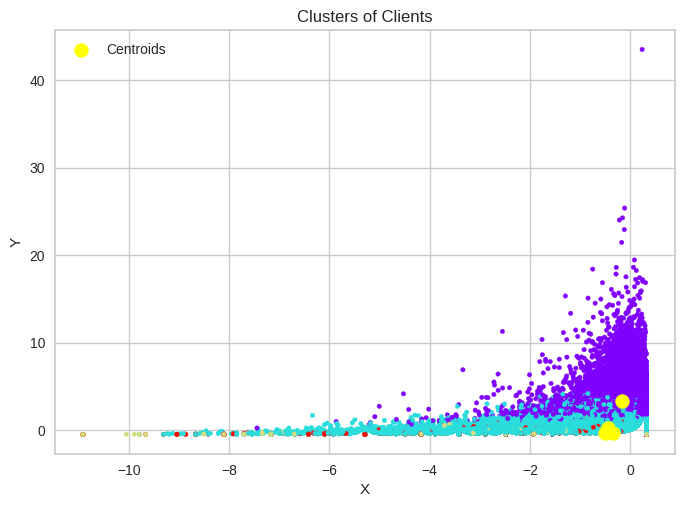

In [31]:
visulaize_cluster(feat_scaled_robust , ykmeans ,model_kmeans  ,0,1 )

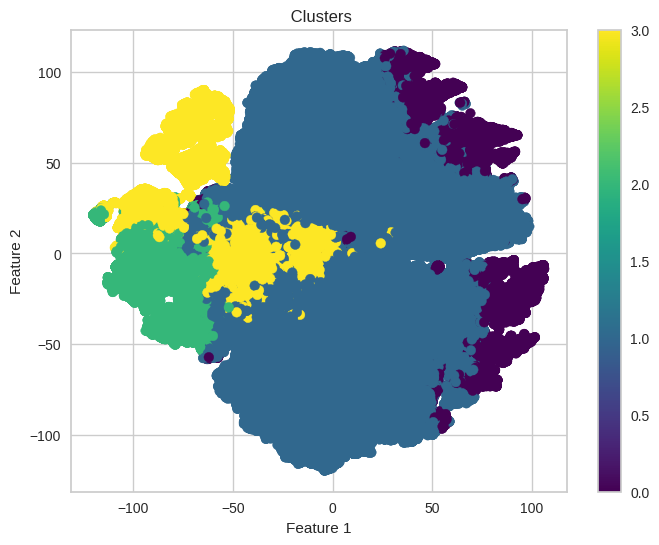

In [25]:
TSNE_plot(feat_scaled_robust  , model_kmeans  )

# The statistics of loyalty scores for each cluster of users
-----------
-------------

## 1st technique

In [16]:
df_score_each_cluster_pt = pd.DataFrame({"Clusters" :  ykmeans_pt , "score" : df['score_min']})
statistic_func = {
"score"    : ["min" , "max" , "mean" , "median" ,"std", "count" , "sum"] 
}

df_statistic_each_cluster_pt = df_score_each_cluster_pt.groupby(['Clusters']).agg(statistic_func)
df_statistic_each_cluster_pt.columns = [ '_'.join(col).strip() for col in df_statistic_each_cluster_pt.columns.values]
df_statistic_each_cluster_pt.reset_index(inplace=True)

In [17]:
df_statistic_each_cluster_pt

,Clusters,score_min,score_max,score_mean,score_median,score_std,score_count,score_sum
0,0,-33.21928,17.675716,-0.400426,-0.076859,3.453939,111381,-44599.860123
1,1,-33.21928,17.965069,-0.375822,0.012913,4.231062,68208,-25634.065785


## 2nd techniques

In [18]:
df_score_each_cluster = pd.DataFrame({"Clusters" : ykmeans , "score" : df['score_min']})
statistic_func = {
"score"    : ["min" , "max" , "mean" , "median" ,"std", "count" , "sum"] 
}

df_statistic_each_cluster = df_score_each_cluster.groupby(['Clusters']).agg(statistic_func)
df_statistic_each_cluster.columns = [ '_'.join(col).strip() for col in df_statistic_each_cluster.columns.values]
df_statistic_each_cluster.reset_index(inplace=True)

In [19]:
df_statistic_each_cluster

,Clusters,score_min,score_max,score_mean,score_median,score_std,score_count,score_sum
0,0,-33.21928,8.918622,-0.416078,-0.108423,3.015191,17262,-7182.340431
1,1,-33.21928,17.675716,-0.364364,-0.040265,3.611225,125514,-45732.782426
2,2,-33.21928,13.602322,-0.389653,0.005570,4.564334,13714,-5343.705020
3,3,-33.21928,17.965069,-0.518425,-0.013120,4.510380,23099,-11975.098031


**Q2 (5 points) Based on your results from Q1, report the statistics of loyalty
scores for each cluster of users. Report your findings.**

- 1st technique:
    - As you can see, the minimum loyalty score is the same for both clusters, at 0. 
    - The maximum loyalty score is almost the same for both clusters, at 17.675716 and 17.965069 respectively. 
    - The mean loyalty score is slightly higher for cluster 1, at -0.375822, compared to cluster 0, at -0.400426. This suggests that users in cluster 0 are less loyal than users in cluster 1.
    - The median loyalty score is also slightly higher for cluster 1, at 0.012913, compared to cluster 0, at -0.076859. 
    - The standard deviation is higher for cluster 1, at 4.231062, compared to cluster 0, at 3.453939.This suggests that there is more variation in the loyalty scores for users in cluster 1 than for users in cluster 0. 
    - The count is higher for cluster 1, at 68208, compared to cluster 0, at 111381. 
    - The sum is lower for cluster 1, at -25634.065785, compared to cluster 0, at -44599.860123.This suggests that the total loyalty of users in cluster 1 is lower than the total loyalty of users in cluster 0.


These findings suggest that the users in cluster 1 are slightly more loyal than the users in cluster 0. However, the difference is not significant. Also,the number of users that have low loyalty(cluster 0) is more than the users that have high loyalty (cluster1)
   
   
- 2nd technique:

    - As you can see, the minimum loyalty score is the same for all three clusters, at 0. 
    - The maximum loyalty score is also the same for all three clusters, at -33.21928. 
    - The mean loyalty score is slightly lower for cluster 0, at -0.416078, compared to cluster 1, at -0.364364. 
    - The median loyalty score is also slightly lower for cluster 0, at -0.108423, compared to cluster 1, at -0.040265. 
    - The standard deviation is higher for cluster 2, at 4.564334, compared to cluster 1, at 3.611225. 
    - The count is higher for cluster 1, at 125514, compared to cluster 0, at 17262. 
    - The sum is lower for cluster 0, at -7182.340431, compared to cluster 1, at -45732.782426.

    These findings suggest that the users in cluster 1 are slightly more loyal than the users in cluster 0. However, the difference is not significant. More data would be needed to confirm these findings and to identify the factors that are driving the difference in loyalty between the two clusters.

    The users in cluster 2 have the highest mean loyalty score, but they also have the highest standard deviation. This suggests that there is a wider range of loyalty scores for the users in cluster 2. The users in cluster 3 have the lowest mean loyalty score, but they also have the lowest standard deviation. This suggests that the loyalty scores for the users in cluster 3 are more consistent.

    Overall, the findings suggest that there is no clear relationship between cluster number and loyalty score. More data would be needed to identify the factors that are driving the difference in loyalty between the clusters.
    Here are some of my findings:

    - The mean score for cluster 3 is lower than the mean score for cluster 0, which is lower than the mean score for cluster 2, and lower than the mean score for cluster 1. This suggests that users in cluster 3 are the least loyal, followed by users in cluster 0, users in cluster 2, and users in cluster 1.The users in cluster 1 are the most loyal.

    - The standard deviation for cluster 2 is higher than the standard deviation for cluster 3, which is higher than the standard deviation for cluster 1, and higher than the standard deviation for cluster 0. This suggests that there is more variation in the loyalty scores for users in cluster 2 than for users in cluster 3, users in cluster 1, and users in cluster 0.
    - The sum of the scores for cluster 0 is lower than the sum of the scores for cluster 1, which is lower than the sum of the scores for cluster 2, and lower than the sum of the scores for cluster 3. This suggests that the total loyalty of users in cluster 0 is lower than the total loyalty of users in cluster 1, users in cluster 2, and users in cluster 3.


    Cluster 0 may be composed of users who are new to the platform, while cluster 3 may be composed of users who have been using the platform for a long time.
    Cluster 1 may be composed of users who are in the middle of their journey with the platform, while cluster 2 may be composed of users who are about to churn.
    These findings could be used to develop marketing campaigns and other strategies to improve the loyalty of users in each cluster.

# PCA 
---------
------------

**Q3 (30 points) Discuss whether you need to reduce the dimensions to
improve clustering performance and build another clustering model (if
you believe dimension reduction would help, you can apply it or choose
another clustering method) to improve your analysis from Q1. You should
explain why the resultant clusters are better than the ones you got in Q1.**

- As you can see, we have too many features (34 features). we thought that the clustering algorithm may have difficulty finding meaningful patterns in the data. 
- So, We need to apply any technique of dimensionality reduction such as pca or tsne ..and etc. This is because when there are too many dimensions, the clustering algorithm may have difficulty finding meaningful patterns in the data. By reducing the number of dimensions, the clustering algorithm may be able to find more meaningful patterns and identify more distinct clusters. It is possible that reducing the dimensions of the data could improve clustering performance. This is what I believe. In this section, we will see if our beleive is true or not.

-  In this case, PCA was used to reduce the number of dimensions from 34 to 8. This was done because the original data had 34 dimensions, which can be too many for some clustering algorithms to handle. PCA was able to reduce the number of dimensions without losing too much information.

- explain why the resultant clusters are better than the ones you got in Q1
    - 1st technique:  
        - The results of the clustering are shown below:

            |Model|Silhouette Score|Within-cluster SSE|
            |-----------|-----------|----------|
            |Model without PCA|0.20966982827837002|2038003.1174518047|
            |Model  with PCA|0.25136557289487754 |1549663.6130757951|
        - The resultant clusters from Model with PCA are better than the ones from Model without PCA. This is because the silhouette score for Model  with PCA is higher than the silhouette score for Model without PCA. 
        - The silhouette score is a measure of how well each data point fits into its cluster. A higher silhouette score indicates that the data points are more tightly clustered together.

        - The within-cluster SSE for Model  with PCA is also lower than the within-cluster SSE for Model  without PCA. The within-cluster SSE is a measure of the average distance between a data point and the other data points in its cluster. A lower within-cluster SSE indicates that the data points are more tightly clustered together.

        - Based on these two metrics, Model  with PCA has better clustering results than Model  without PCA. This suggests that the clusters in Model with PCA are more distinct and that the data points in each cluster are more similar to each other.
        - Model without PCA: This model uses k-means clustering with k=2 on the original data (34 features).
        - Model with PCA: This model uses k-means clustering with 9 or 7 components on the data after PCA has been applied.

        - The results of the clustering show that Model with PCA was able to find better clusters than Model  without PCA. This suggests that PCA can be a useful tool for improving the performance of clustering algorithms.
    - 2nd technique:  
        - The results of the clustering are shown below:
            |Model|Silhouette Score|Within-cluster SSE|
            |-----------|-----------|----------|
            |Model without PCA|0.3502546095193951|4871439.574943939|
            |Model  with PCA|0.4431308536454652|3274935.0603790013|
        - The resultant clusters from Model with PCA are better than the ones from Model without PCA. This is because the silhouette score for Model  with PCA is higher than the silhouette score for Model without PCA. 
        - The silhouette score is a measure of how well each data point fits into its cluster. A higher silhouette score indicates that the data points are more tightly clustered together.

        - The within-cluster SSE for Model  with PCA is also lower than the within-cluster SSE for Model  without PCA. The within-cluster SSE is a measure of the average distance between a data point and the other data points in its cluster. A lower within-cluster SSE indicates that the data points are more tightly clustered together.

        - Based on these two metrics, Model  with PCA has better clustering results than Model  without PCA. This suggests that the clusters in Model with PCA are more distinct and that the data points in each cluster are more similar to each other.

       - Model without PCA: This model uses k-means clustering with k=2 on the original data (34 features).
        - Model with PCA: This model uses k-means clustering with 8 components on the data after PCA has been applied.

        - The results of the clustering show that Model with PCA was able to find better clusters than Model  without PCA. This suggests that PCA can be a useful tool for improving the performance of clustering algorithms.

        
        





## 1st technique 

In [13]:
principal_pt =PCA(n_components=0.8)
principal_pt.fit(feat_scaled_robust_pt)
feat_scaled_robust_pca_pt =principal_pt.transform(feat_scaled_robust_pt)

PCA(n_components=0.8)

In [25]:
feat_scaled_robust_pca_pt.shape

(179589, 9)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kme

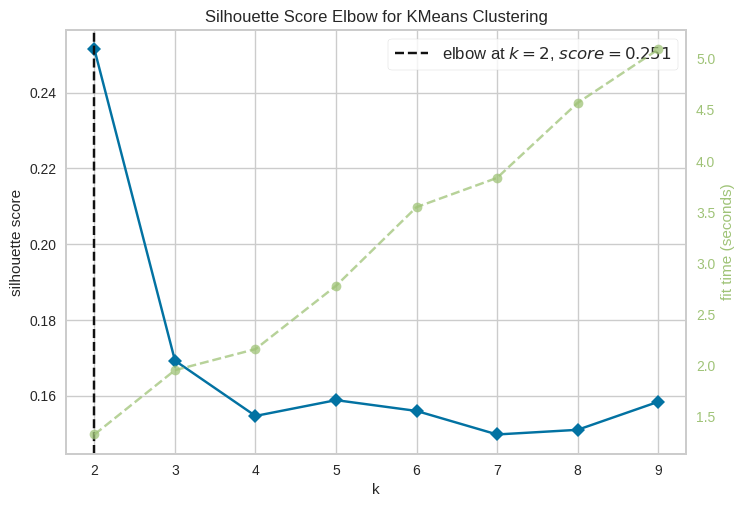

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kme

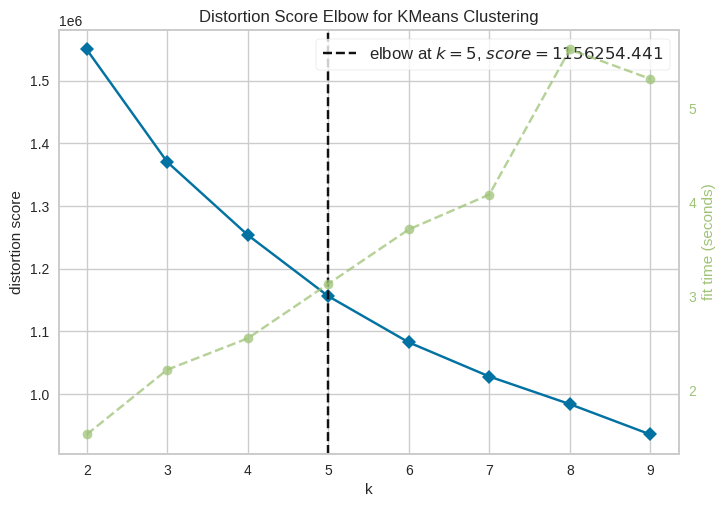

In [31]:
best_k(feat_scaled_robust_pca_pt)

In [14]:
model_kmeans_pca_pt , ykmeans_pca_pt = fit_kmeans (2 , feat_scaled_robust_pca_pt )

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
# Add cluster column to the main datasets to interpet the meaning of each cluster
feat_scaled_robust_pca_pt = pd.DataFrame(feat_scaled_robust_pca_pt )
feat_scaled_robust_pca_pt['cluster'] = ykmeans_pca_pt
feat_scaled_robust_pca_pt

# Select cluster 0  and print the summary for its feature
feat_scaled_robust_pca_pt[feat_scaled_robust_pca_pt['cluster'] == 0].describe()
feat_scaled_robust_pca_pt[feat_scaled_robust_pca_pt['cluster'] == 1].describe()

,0,1,2,3,4,5,6,7,8,cluster
0,-0.865256,-0.797692,0.863378,0.640566,0.301601,0.375856,-0.895298,-1.051177,-1.229662,1
1,1.583868,0.732878,-0.661384,0.856141,-0.205958,0.358762,0.698609,-0.227461,-0.051920,0
2,2.401039,-1.427452,1.020384,-0.816072,-0.213029,0.260457,0.094701,0.457736,-0.607120,0
3,-0.023320,0.632520,-2.127136,0.003266,-1.226488,-0.623407,0.432019,-0.250367,-1.647044,0
4,1.547391,0.249141,-1.039026,0.346952,-0.179029,-0.326110,-0.829289,-0.708675,0.365850,0
...,...,...,...,...,...,...,...,...,...,...
179584,0.448482,-0.775492,0.939835,-0.301285,0.243778,-0.926534,0.455985,-1.286543,-0.376331,0
179585,3.153893,-0.715191,0.942869,-1.802992,0.743258,1.569315,0.151431,0.682697,0.995247,0
179586,1.789547,-0.136297,-0.967005,-0.551440,-0.639463,-0.505115,-0.093806,0.039941,0.837227,0
179587,-0.173224,-1.066609,0.692610,2.108255,0.158605,-0.786609,0.990647,-0.908722,-0.383200,0


,0,1,2,3,4,5,6,7,8,cluster
count,111556.000000,111556.000000,111556.000000,111556.000000,111556.000000,111556.000000,111556.000000,111556.000000,111556.000000,111556.0
mean,1.419438,-0.036443,-0.037562,-0.011566,0.004229,-0.017456,0.006799,0.009693,-0.005876,0.0
std,1.230771,1.121827,1.076240,0.878779,0.717412,0.831509,0.738073,0.706044,0.702350,0.0
min,-0.571318,-2.734344,-3.034277,-3.413082,-2.662549,-1.967142,-2.480778,-2.550846,-2.380032,0.0
25%,0.425285,-0.921908,-0.888154,-0.646014,-0.457530,-0.688175,-0.509638,-0.461918,-0.482745,0.0
50%,1.260153,-0.080804,-0.037916,-0.039592,0.014234,-0.199029,-0.032405,0.084802,-0.030378,0.0
75%,2.247892,0.764808,0.785771,0.596960,0.496773,0.670194,0.495486,0.509530,0.485650,0.0
max,6.334435,5.121297,3.881657,3.829320,2.607592,2.544787,3.097593,3.215959,2.643137,0.0


,0,1,2,3,4,5,6,7,8,cluster
count,68033.000000,68033.000000,68033.000000,68033.000000,68033.000000,68033.000000,68033.000000,68033.000000,68033.000000,68033.0
mean,-2.327500,0.059757,0.061592,0.018966,-0.006934,0.028623,-0.011149,-0.015894,0.009635,1.0
std,1.386328,1.496288,1.252048,1.035766,1.094473,0.841866,0.834051,0.772414,0.753687,0.0
min,-5.910322,-4.052846,-3.576095,-3.273508,-2.834773,-2.140148,-3.028560,-2.884001,-2.680024,1.0
25%,-3.366580,-1.078256,-0.798335,-0.663306,-0.888788,-0.650863,-0.585888,-0.518888,-0.510535,1.0
50%,-2.020564,-0.105484,0.076675,0.031148,-0.050277,-0.080743,-0.005121,-0.006346,-0.016002,1.0
75%,-1.134017,1.096618,0.904609,0.710466,0.834749,0.676633,0.570087,0.499681,0.532706,1.0
max,-0.306287,5.310939,4.164789,3.899958,3.633708,2.807372,2.907687,3.376662,2.680846,1.0


In [32]:
evaluate_cluster(feat_scaled_robust_pca_pt ,  model_kmeans_pca_pt )

Silhouette score: 0.25136557312574415
Within-cluster SSE: 1549663.610233208


(0.25136557312574415, 1549663.610233208)

**Q1 (30 points) Our goal is to cluster users based on their spending behaviors. Your task is to perform a clustering analysis leveraging the K-means
method and report your findings. You should specify how you select the
right ”K” for the k-means method, and  how you create features. Explain
the resultant clusters (the meaning of each cluster) and judge the quality
of resultant clusters.**

- judge the quality of resultant clusters
    
The quality of the resultant clusters can be judged by the following:

- Silhouette score: The silhouette score is a measure of how well each data point is clustered. A score of 1 indicates that the data point is perfectly clustered, while a score of -1 indicates that the data point is misclassified. A score of 0 indicates that the data point is on the boundary between two clusters. The silhouette score for the resultant clusters is 0.25136557312574415, which indicates that the clusters are not perfectly separated. Also,it indicates a moderate separation and overlaps between the clusters.

- Within-cluster SSE: The within-cluster SSE is a measure of the average distance between each data point and the center of its cluster. A lower SSE indicates that the data points are more tightly clustered together. The within-cluster SSE for the resultant clusters is 1549663.610233208, which indicates that the clusters are not very tightly clustered together.


Based on these two measures, the quality of the resultant clusters is not very good. The clusters are not perfectly separated, and the data points are not very tightly clustered together. This could be due to a number of factors, such as the quality of the data, the number of clusters, or the clustering algorithm used.

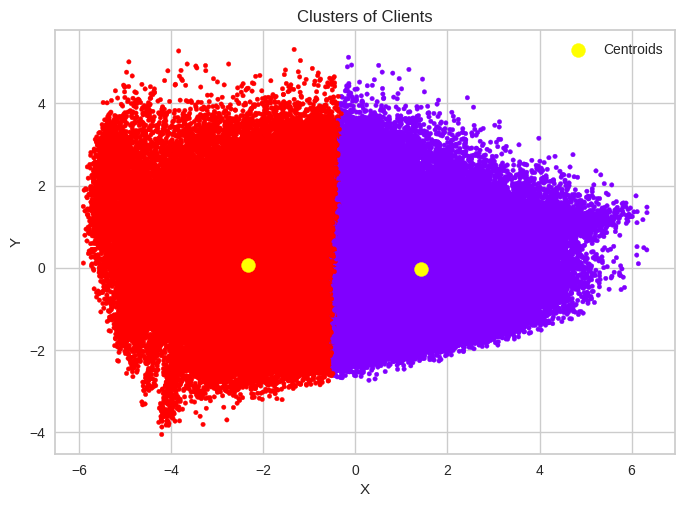

In [28]:
visulaize_cluster(pd.DataFrame(feat_scaled_robust_pca_pt) , pd.DataFrame(ykmeans_pca_pt) ,model_kmeans_pca_pt  , 0 , 1 )

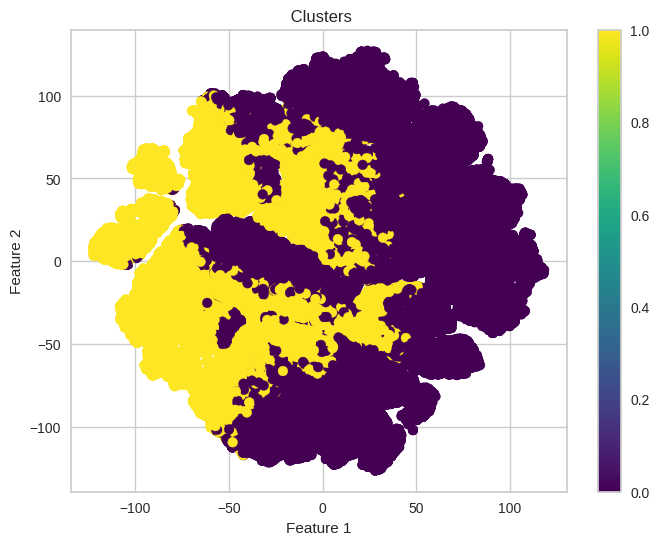

In [35]:
TSNE_plot(feat_scaled_robust_pca_pt ,model_kmeans_pca_pt  )

## 2nd technique
---------
----------

In [16]:
principal=PCA(n_components=0.8)
principal.fit(feat_scaled_robust)
feat_scaled_robust_pca=principal.transform(feat_scaled_robust)

PCA(n_components=0.8)

In [37]:
principal.explained_variance_ratio_

array([0.34401293, 0.15166347, 0.1112592 , 0.07354881, 0.052986  ,
       0.04468359, 0.03155883])

In [17]:
feat_scaled_robust_pca.shape

(179589, 7)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kme

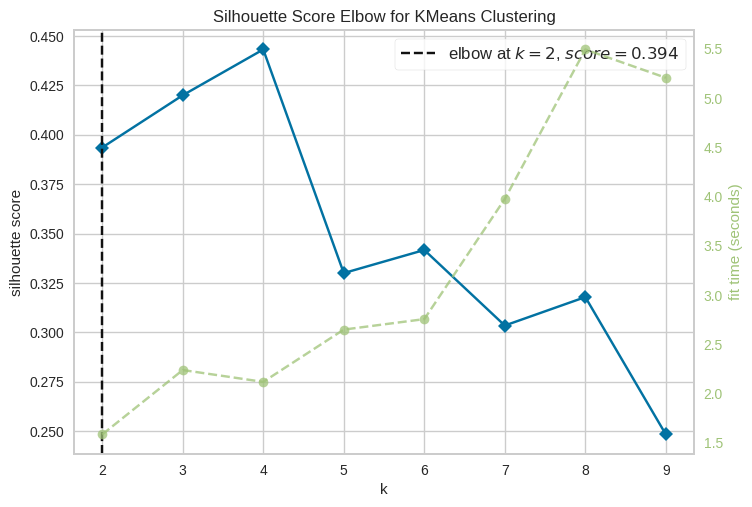

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kme

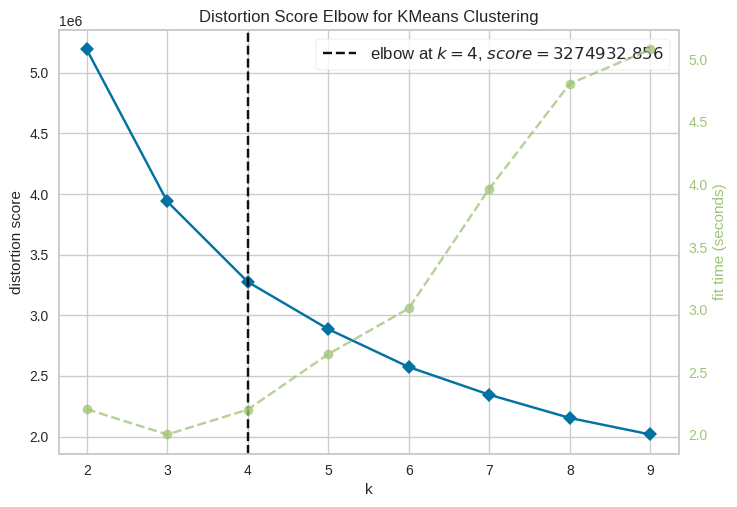

In [39]:
best_k(feat_scaled_robust_pca)

In [18]:
model_kmeans_pca , ykmeans_pca = fit_kmeans (4 , feat_scaled_robust_pca )

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
# Add cluster column to the main datasets to interpet the meaning of each cluster
feat_scaled_robust_pca = pd.DataFrame(feat_scaled_robust_pca)
feat_scaled_robust_pca['cluster'] = ykmeans_pca
feat_scaled_robust_pca

# Select cluster 0  and print the summary for its feature
feat_scaled_robust_pca[feat_scaled_robust_pca['cluster'] == 0].describe()
feat_scaled_robust_pca[feat_scaled_robust_pca['cluster'] == 1].describe()
feat_scaled_robust_pca[feat_scaled_robust_pca['cluster'] == 2].describe()
feat_scaled_robust_pca[feat_scaled_robust_pca['cluster'] == 3].describe()

,0,1,2,3,4,5,6,cluster
0,-1.139285,-1.588639,-0.156425,-0.480794,0.412346,0.638272,0.484703,1
1,1.022012,-1.543803,-0.303738,1.430023,-0.948050,0.352252,0.277791,1
2,4.668572,0.775637,0.454551,-2.297938,0.198489,-0.229720,0.470209,0
3,-0.790557,-1.944137,0.063831,1.947007,-2.511390,-1.277344,-0.185312,1
4,1.102108,-2.061359,-0.477633,1.084061,-0.073439,0.155265,1.147088,1
...,...,...,...,...,...,...,...,...
179584,0.304073,-1.503745,-0.995197,-1.191112,0.055626,-0.217144,0.730579,1
179585,7.574646,2.636712,0.390472,-2.385662,0.611493,-0.015412,-1.892217,0
179586,1.198187,-1.601984,-0.144570,0.924376,-0.698438,-0.179649,0.398375,1
179587,-0.239901,-2.464976,-0.231875,-1.078283,-0.105542,1.121064,-0.270993,1


,0,1,2,3,4,5,6,cluster
count,17239.000000,17239.000000,17239.000000,17239.000000,17239.000000,17239.000000,17239.000000,17239.0
mean,8.075062,3.397267,0.702380,0.005825,0.223537,0.075341,0.029589,0.0
std,4.152739,3.140072,1.035202,4.445326,1.180863,1.286711,3.095778,0.0
min,1.192457,-0.132597,-4.104175,-23.320399,-6.402853,-7.593135,-26.077850,0.0
25%,5.373480,1.327329,0.091698,-3.418235,-0.447177,-0.729375,-1.383616,0.0
50%,6.777066,2.434149,0.549582,-1.322483,0.198781,0.111797,-0.279550,0.0
75%,9.366672,4.427301,1.115549,3.484869,0.853205,0.864663,2.015876,0.0
max,74.406751,55.817480,11.256972,37.537177,15.512013,10.189942,26.753885,0.0


,0,1,2,3,4,5,6,cluster
count,125595.000000,125595.000000,125595.000000,125595.000000,125595.000000,125595.000000,125595.000000,125595.0
mean,0.343198,-1.333781,-0.204179,-0.038834,-0.201793,0.149997,0.009908,1.0
std,1.725107,1.052134,0.873212,1.347990,0.998533,1.036006,0.844078,0.0
min,-4.660912,-3.381221,-4.063061,-5.782222,-5.712157,-4.522998,-4.892857,1.0
25%,-0.888143,-2.128609,-0.644998,-1.125587,-0.717397,-0.433318,-0.357679,1.0
50%,0.184382,-1.522451,-0.278751,0.147727,-0.074383,0.049304,0.056278,1.0
75%,1.490694,-0.702039,0.185856,1.039320,0.394122,0.594735,0.422342,1.0
max,4.970201,5.433720,5.444325,4.465577,4.013706,9.362257,3.504815,1.0


,0,1,2,3,4,5,6,cluster
count,23057.000000,23057.000000,23057.000000,23057.000000,23057.000000,23057.000000,23057.000000,23057.0
mean,-4.921568,3.827132,-2.846885,-0.110434,0.436684,-0.346153,-0.033666,2.0
std,2.330529,2.287159,1.999751,1.159030,3.034395,2.200400,0.545108,0.0
min,-12.678794,-0.083626,-7.055272,-3.913941,-11.450667,-5.346944,-5.546205,2.0
25%,-6.375781,2.268697,-4.393056,-0.942846,-0.556345,-1.849654,-0.333666,2.0
50%,-4.679386,3.303362,-3.283108,-0.156116,1.059709,-0.971159,-0.024769,2.0
75%,-3.275726,4.911132,-1.653828,0.732264,2.401404,0.564742,0.268186,2.0
max,2.300829,12.945012,3.802915,4.164192,7.141387,8.787048,2.784925,2.0


,0,1,2,3,4,5,6,cluster
count,13698.000000,13698.000000,13698.000000,13698.000000,13698.000000,13698.000000,13698.000000,13698.0
mean,-5.025070,1.511797,5.780122,0.534623,0.833848,-0.887464,-0.071416,3.0
std,1.971199,1.990975,2.274562,1.019968,2.163333,2.480712,0.520520,0.0
min,-10.816710,-2.233640,0.738683,-3.267851,-6.703494,-6.043364,-4.062640,3.0
25%,-6.407616,0.031293,3.977106,-0.166928,-0.706882,-2.662583,-0.379828,3.0
50%,-5.095915,1.128746,5.523297,0.547951,0.985465,-1.519482,-0.083377,3.0
75%,-3.649459,2.664724,7.544496,1.290086,2.413937,0.348680,0.213582,3.0
max,2.682333,9.335161,11.238425,3.950369,8.028924,9.310894,2.269128,3.0


In [41]:
evaluate_cluster(feat_scaled_robust_pca ,  model_kmeans_pca )

Silhouette score: 0.4431308536454652

Within-cluster SSE: 3274935.0603790013


(0.4431308536454652, 3274935.0603790013)

**Q1 (30 points) Our goal is to cluster users based on their spending behaviors. Your task is to perform a clustering analysis leveraging the K-means
method and report your findings. You should specify how you select the
right ”K” for the k-means method, and  how you create features. Explain
the resultant clusters (the meaning of each cluster) and judge the quality
of resultant clusters.**

- judge the quality of resultant clusters
    
    - The quality of the resultant clusters can be judged by the following:

        - Silhouette score: The silhouette score is a measure of how well each data point is clustered. A score of 1 indicates that the data point is perfectly clustered, while a score of -1 indicates that the data point is misclassified. A score of 0 indicates that the data point is on the boundary between two clusters. The silhouette score for the resultant clusters is 0.4431308536454652, which indicates that the clusters are relatively high separation and distinctness between the clusters. This suggests that the clusters are well-separated and distinct from each other.

        - Within-cluster SSE: The within-cluster SSE is a measure of the average distance between each data point and the center of its cluster. A lower SSE indicates that the data points are more tightly clustered together. The within-cluster SSE for the resultant clusters is 3274935.0603790013, which indicates that the clusters are relatively tightly clustered together.


Based on these two measures, the quality of the resultant clusters is well-separated and distinct clusters.This is the best model compared to previous ones 


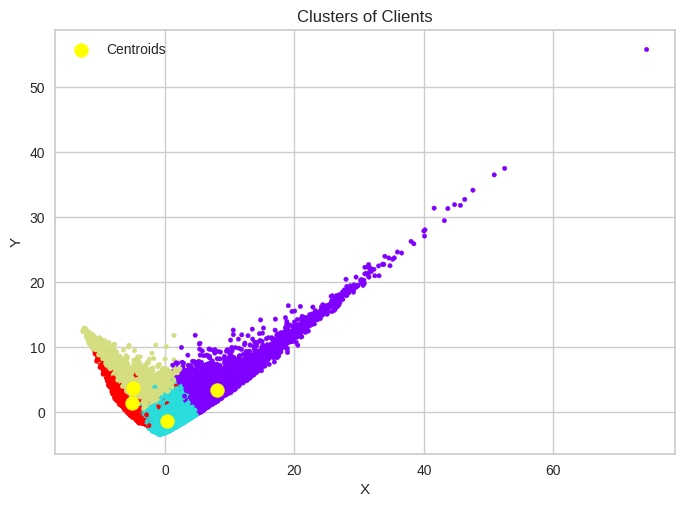

In [27]:
visulaize_cluster(pd.DataFrame(feat_scaled_robust_pca) , pd.DataFrame(ykmeans_pca) ,model_kmeans_pca  , 0 , 1 )

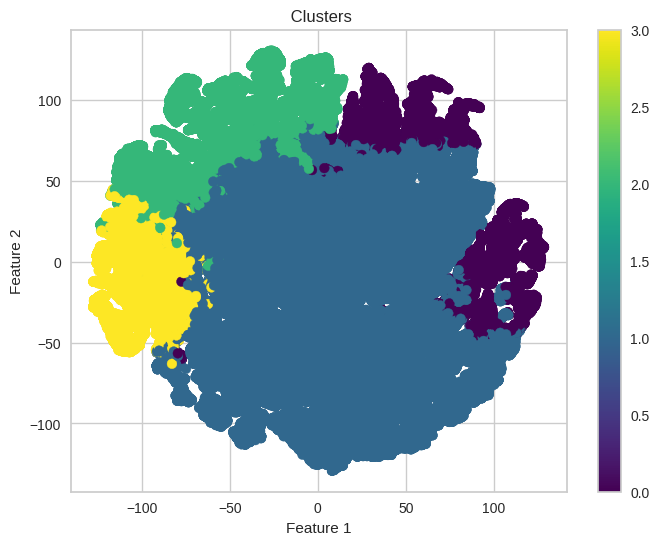

In [43]:
TSNE_plot(feat_scaled_robust_pca ,model_kmeans_pca  )

# The statistics of loyalty scores for each cluster of users
-----------
-------------

**Q1 (30 points) Our goal is to cluster users based on their spending behaviors. Your task is to perform a clustering analysis leveraging the K-means method and report your findings. You should specify how you select the right ”K” for the k-means method, and how you create features. Explain the resultant clusters (the meaning of each cluster) and judge the quality of resultant clusters.**
-  Explain the resultant clusters (the meaning of each cluster)

    - In the previous section, we used PCA to reduce the dimensionality of the data and then printed the describe of each cluster to interpret the meaning of each cluster. However, PCA generated ambiguous features, so we couldn't understand the meaning of each cluster.So, we will understanding the meaning of each cluster using the statistics of loyalty scores for each cluster of users in Question4.

**Q4 (5 points) Based on your results from Q3, report the statistics of loyalty
scores for each cluster of users. Report your findings**
- 1st technique:
    - As you can see, the minimum loyalty score is the same for both clusters, at 0. 
    - The maximum loyalty score is almost the same for both clusters, at 17.675716 and 17.965069 respectively.
    - The mean loyalty score is slightly higher for cluster 1, at -0.375822, compared to cluster 0, at -0.400426. This suggests that users in cluster 0 are less loyal than users in cluster 1.
    - The median loyalty score is also slightly higher for cluster 1, at 0.012913, compared to cluster 0, at -0.076859. 
    - The standard deviation is higher for cluster 1, at 4.231062, compared to cluster 0, at 3.453939.This suggests that there is more variation in the loyalty scores for users in cluster 1 than for users in cluster 0. 
    - The count is higher for cluster 1, at 68208, compared to cluster 0, at 111381. 
    - The sum is lower for cluster 1, at -25634.065785, compared to cluster 0, at -44599.860123.This suggests that the total loyalty of users in cluster 1 is lower than the total loyalty of users in cluster 0.


These findings suggest that the users in cluster 1 are slightly more loyal than the users in cluster 0. However, the difference is not significant. Also,the number of users that have low loyalty(cluster 0) is more than the users that have high loyalty (cluster1).
Cluster 0 and 1 have the same maximum and minimum values.This finding suggests that there is no clear distinction between these two clusters (0 and 1). It is possible that these two clusters could be merged into one cluster.There is an overlapping between these 2 clusters as shown in the previus visualizations.
   
   
- 2nd technique:
    - As you can see, the minimum loyalty score is the same for all four clusters.
    - The maximum loyalty score is almost the same for both clusters 1 and 2 , at 17.675716 and 17.965069 respectively. Cluster 0 has lowest maximum loyalty score compared to other clusters
    - The mean score for cluster 2 is lower than the mean score for cluster 0, which is lower than the mean score for cluster 3, and lower than the mean score for cluster 1. This suggests that users in cluster 2 are the least loyal, followed by users in cluster 0, users in cluster 3, and users in cluster 2.The users in cluster 1 have the highest mean loyalty score.These findings suggest that the users in cluster 1 are more loyal than the users in cluster 3, users in cluster 0, and users in cluster 2.However, the difference is not significant.
    - The standard deviation for cluster 3 is higher than the standard deviation for cluster 2, which is higher than the standard deviation for cluster 1, and higher than the standard deviation for cluster 0. This suggests that there is more variation in the loyalty scores for users in cluster 3 than for users in cluster 2, users in cluster 1, and users in cluster 0.
    - The sum of the scores for cluster 3 is lower than the sum of the scores for cluster 0, which is lower than the sum of the scores for cluster 2, and lower than the sum of the scores for cluster 1. This suggests that the total loyalty of users in cluster 3 is lower than the total loyalty of users in cluster 0, users in cluster 2, and users in cluster 1.
    - The count is higher for cluster 1, at 125514, compared to cluster 3, at 13698.The sum of the scores for cluster 1 is higher than the sum of the scores for cluster 2, which is higher than the sum of the scores for cluster 0, and higher than the sum of the scores for cluster 3. This suggests that the total number of users in cluster 1 is higher than the total number of users in cluster 2, users in cluster 3, and users in cluster 0. Cluster 1 assigns the most of score compared to others.


Cluster 1 and 2 have the same maximum and minimum values.This finding suggests that there is no clear distinction between these two clusters (1 and 2). It is possible that these two clusters could be merged into one cluster.There is an overlapping between these 2 clusters as shown in the previus visualizations..




## 1st technique 
--------------------
----------

In [28]:
df_score_each_cluster_PCA_pt = pd.DataFrame({"Clusters" : ykmeans_pca_pt , "score" : df['score_min']})
df_statistic_each_cluster_PCA_pt = df_score_each_cluster_PCA_pt.groupby(['Clusters']).agg(statistic_func)
df_statistic_each_cluster_PCA_pt.columns = [ '_'.join(col).strip() for col in df_statistic_each_cluster_PCA_pt.columns.values]
df_statistic_each_cluster_PCA_pt.reset_index(inplace=True)

In [29]:
df_statistic_each_cluster_PCA_pt

,Clusters,score_min,score_max,score_mean,score_median,score_std,score_count,score_sum
0,0,-33.21928,17.675716,-0.400714,-0.076751,3.456145,111556,-44702.032260
1,1,-33.21928,17.965069,-0.375287,0.013013,4.229920,68033,-25531.893648


## 2nd technique
----------
----------

In [30]:
df_score_each_cluster_PCA = pd.DataFrame({"Clusters" : ykmeans_pca , "score" : df['score_min']})
df_statistic_each_cluster_PCA = df_score_each_cluster_PCA.groupby(['Clusters']).agg(statistic_func)
df_statistic_each_cluster_PCA.columns = [ '_'.join(col).strip() for col in df_statistic_each_cluster_PCA.columns.values]
df_statistic_each_cluster_PCA.reset_index(inplace=True)

In [31]:
df_statistic_each_cluster_PCA

,Clusters,score_min,score_max,score_mean,score_median,score_std,score_count,score_sum
0,0,-33.21928,8.918622,-0.416824,-0.108856,3.017370,17239,-7185.635934
1,1,-33.21928,17.675716,-0.364299,-0.040101,3.611628,125595,-45754.127243
2,2,-33.21928,17.965069,-0.521263,-0.014312,4.518271,23057,-12018.762925
3,3,-33.21928,13.602322,-0.385122,0.006220,4.549013,13698,-5275.399806


# Frequent Pattern 
------------
-----------------

In [6]:
def frequent_pattern(df , min_sup):
    df_onehot = pd.get_dummies(df.astype("category"))
    frequent_itemsets = apriori(df_onehot, min_support= min_sup, use_colnames=True)
    print("frequent_itemsets" )
    print(frequent_itemsets )    
    return frequent_itemsets


In [5]:

merged_data = pd.read_csv("/kaggle/input/merged-data/source/final_merged_data.csv")
merged_data.head()


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,merchant_group_id,numerical_1,numerical_2,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,first_active_month,feature_1,feature_2,feature_3,score
0,Y,C_ID_43528d74e5,140,N,1,B,307,M_ID_88920c89e8,0,-0.812057,2018-04-29 19:14:11,1.0,9,19,48955,0.031763,0.031763,B,B,1.14,1.081037,3,1.13,1.088138,6,1.13,1.102611,12,N,Sep-17,5,1,1,-0.108923
1,Y,C_ID_43528d74e5,69,N,1,B,606,M_ID_cd2c0b07e9,0,-1.171821,2018-04-11 13:41:41,1.0,9,17,35,-0.057471,-0.057471,A,A,0.90,0.913902,3,0.73,0.744417,6,0.53,0.540334,10,Y,Sep-17,5,1,1,-0.108923
2,Y,C_ID_43528d74e5,233,N,1,B,278,M_ID_bd1537ab63,-1,-1.043365,2018-03-01 18:38:30,1.0,9,37,1822,-0.027726,-0.027726,D,C,1.05,1.085648,3,1.06,1.113040,6,1.07,1.128569,12,N,Sep-17,5,1,1,-0.108923
3,Y,C_ID_43528d74e5,213,N,1,B,80,M_ID_fbf77966f9,0,-1.338998,2018-04-16 10:50:32,1.0,9,37,11054,-0.047556,-0.047556,D,C,0.92,0.846318,3,0.97,0.932053,6,0.84,0.858947,12,N,Sep-17,5,1,1,-0.108923
4,Y,C_ID_43528d74e5,238,N,1,B,80,M_ID_c997d876e8,0,-1.231479,2018-04-13 09:55:18,1.0,9,37,35,2.143638,2.103978,C,B,1.13,1.140271,3,1.19,1.183669,6,1.23,1.234908,12,N,Sep-17,5,1,1,-0.108923


In [7]:
cat_features = ['authorized_flag','category_2','category_1', 'category_3' , 'category_4' ,'most_recent_sales_range' , 'most_recent_purchases_range' , 'active_months_lag12' , 'feature_1' , 'feature_2' , 'feature_3']
selected_column_merged_data = merged_data[cat_features + ['score']]
merged_data_cat_features = selected_column_merged_data.drop(['score'] , axis = 1)


In [9]:
frequent_cooccurring_transaction = frequent_pattern(merged_data_cat_features , 0.5)

/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


frequent_itemsets
     support                                           itemsets
0   0.941139                                (authorized_flag_Y)
1   0.584443                                   (category_2_1.0)
2   1.000000                                     (category_1_N)
3   0.593031                                     (category_3_A)
4   0.550741                                     (category_4_Y)
5   0.978810                           (active_months_lag12_12)
6   0.562354                                      (feature_3_1)
7   0.550477                (category_2_1.0, authorized_flag_Y)
8   0.941139                  (category_1_N, authorized_flag_Y)
9   0.555295                  (category_3_A, authorized_flag_Y)
10  0.519262                  (category_4_Y, authorized_flag_Y)
11  0.921064        (active_months_lag12_12, authorized_flag_Y)
12  0.522458                   (feature_3_1, authorized_flag_Y)
13  0.584443                     (category_1_N, category_2_1.0)
14  0.572359          

In [10]:
frequent_cooccurring_transaction_2 = frequent_pattern(merged_data_cat_features , 0.7)

/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


frequent_itemsets
    support                                           itemsets
0  0.941139                                (authorized_flag_Y)
1  1.000000                                     (category_1_N)
2  0.978810                           (active_months_lag12_12)
3  0.941139                  (category_1_N, authorized_flag_Y)
4  0.921064        (active_months_lag12_12, authorized_flag_Y)
5  0.978810             (active_months_lag12_12, category_1_N)
6  0.921064  (active_months_lag12_12, category_1_N, authori...


In [11]:
frequent_cooccurring_transaction.sort_values("support", ascending = False)

,support,itemsets
2,1.000000,(category_1_N)
5,0.978810,(active_months_lag12_12)
17,0.978810,"(active_months_lag12_12, category_1_N)"
0,0.941139,(authorized_flag_Y)
8,0.941139,"(category_1_N, authorized_flag_Y)"
26,0.921064,"(active_months_lag12_12, category_1_N, authori..."
11,0.921064,"(active_months_lag12_12, authorized_flag_Y)"
3,0.593031,(category_3_A)
15,0.593031,"(category_3_A, category_1_N)"
13,0.584443,"(category_1_N, category_2_1.0)"


In [12]:
frequent_cooccurring_transaction_2.sort_values("support", ascending = False)

,support,itemsets
1,1.000000,(category_1_N)
2,0.978810,(active_months_lag12_12)
5,0.978810,"(active_months_lag12_12, category_1_N)"
0,0.941139,(authorized_flag_Y)
3,0.941139,"(category_1_N, authorized_flag_Y)"
4,0.921064,"(active_months_lag12_12, authorized_flag_Y)"
6,0.921064,"(active_months_lag12_12, category_1_N, authori..."


**Q5 (20 points) Use frequent pattern mining to find frequently co-occurring
transaction types. Report your findings and justify how you pick the min
support threshold.**

- how you pick the min support threshold
     - we mainly specify the min support threshold through trail and error. we need to strike a balance between keeping frequent itemsets and ensuring that the itemsets discovered are significant. A too low support threshold will lead to many frequent itemsets, most of which may not be useful, while a too high support threshold may lead to fewer itemsets, some of which may not capture the interesting patterns in the data.
     - Through trail different values of min support thresholds, we could pick the min support threshold
     - The choice of min support threshold is a trade-off between the risk of identifying meaningless patterns and the risk of missing important patterns.




 - we used a min support threshold of 0.5, which means that a transaction type must appear in at least 50% of the transactions in order to be considered frequent. The following are the most frequent transaction types:

    |support|	itemsets|
    |---------|--------|
    |1.000000|(category_1_N)|
    |0.978810	|(active_months_lag12_12)|
    |0.978810	|(active_months_lag12_12, category_1_N)|
    |0.941139	|(authorized_flag_Y)|
    |0.941139	|(category_1_N, authorized_flag_Y)|
    |0.921064	|(active_months_lag12_12, category_1_N, authorized_flag_Y)|

    These results suggest that the following transaction types are frequently co-occurring:
    - Category 1
    - Active months lag 12-12
    - Authorized flag Y
    These transaction types may be related to each other in a number of ways. For example, customers who are in category 1 may be more likely to have an active account and to have authorized a payment in the past 12 months. Additionally, customers who have an active account may be more likely to have authorized a payment in the past 12 months. This information can be used to improve the efficiency of marketing campaigns and to better understand customer behavior.

    The min support threshold of 0.5 was chosen because it is a reasonable threshold for identifying frequently co-occurring transaction types. A lower threshold would result in a larger number of transaction types being identified as frequent, which could make it more difficult to identify meaningful patterns. A higher threshold would result in a smaller number of transaction types being identified as frequent, which could make it more difficult to identify any patterns at all. As you see there are about 38 frequent patterns. It is a large  number transaction types being identified as frequent, which could make it more difficult to identify meaningful patterns. So, we try to increase the min support. We are inspired that we use min support 0.7

    

- we used a min support threshold of 0.7, which means that a transaction type must appear in at least 70% of the transactions in order to be considered frequent. The following are the most frequent transaction types:

    |support|	itemsets|
    |---------|--------|
    |1.000000|(category_1_N)|
    |0.978810	|(active_months_lag12_12)|
    |0.978810	|(active_months_lag12_12, category_1_N)|
    |0.941139	|(authorized_flag_Y)|
    |0.941139	|(category_1_N, authorized_flag_Y)|
    |0.921064	|(active_months_lag12_12, category_1_N, authorized_flag_Y)|

    These results suggest that the following transaction types are frequently co-occurring:
    - Category 1
    - Active months lag 12-12
    - Authorized flag Y
    These transaction types may be related to each other in a number of ways. For example, customers who are in category 1 may be more likely to have an active account and to have authorized a payment in the past 12 months. Additionally, customers who have an active account may be more likely to have authorized a payment in the past 12 months.
    I believe that the min support with 0.7 is better. It focuses on the main and important frequent patterns.

# Split Score Based on median
-------
----

In [14]:
users_high_score = selected_column_merged_data[selected_column_merged_data['score'] >= selected_column_merged_data['score'].median()]
cat_features_users_high_score = users_high_score.drop(['score'] , axis = 1)
users_low_score = selected_column_merged_data[selected_column_merged_data['score'] < selected_column_merged_data['score'].median()]
cat_features_users_low_score = users_low_score.drop(['score'] , axis = 1)


In [15]:
frequent_cooccurring_transaction_high_score = frequent_pattern(cat_features_users_high_score , 0.7)
frequent_cooccurring_transaction_low_score = frequent_pattern(cat_features_users_low_score ,0.7)

/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


frequent_itemsets
    support                                           itemsets
0  0.940392                                (authorized_flag_Y)
1  1.000000                                     (category_1_N)
2  0.978939                           (active_months_lag12_12)
3  0.940392                  (category_1_N, authorized_flag_Y)
4  0.920493        (active_months_lag12_12, authorized_flag_Y)
5  0.978939             (active_months_lag12_12, category_1_N)
6  0.920493  (active_months_lag12_12, category_1_N, authori...


/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


frequent_itemsets
    support                                           itemsets
0  0.941887                                (authorized_flag_Y)
1  1.000000                                     (category_1_N)
2  0.978682                           (active_months_lag12_12)
3  0.941887                  (category_1_N, authorized_flag_Y)
4  0.921635        (active_months_lag12_12, authorized_flag_Y)
5  0.978682             (active_months_lag12_12, category_1_N)
6  0.921635  (active_months_lag12_12, category_1_N, authori...


In [16]:
frequent_cooccurring_transaction_high_score

,support,itemsets
0,0.940392,(authorized_flag_Y)
1,1.000000,(category_1_N)
2,0.978939,(active_months_lag12_12)
3,0.940392,"(category_1_N, authorized_flag_Y)"
4,0.920493,"(active_months_lag12_12, authorized_flag_Y)"
5,0.978939,"(active_months_lag12_12, category_1_N)"
6,0.920493,"(active_months_lag12_12, category_1_N, authori..."


In [17]:
frequent_cooccurring_transaction_low_score

,support,itemsets
0,0.941887,(authorized_flag_Y)
1,1.000000,(category_1_N)
2,0.978682,(active_months_lag12_12)
3,0.941887,"(category_1_N, authorized_flag_Y)"
4,0.921635,"(active_months_lag12_12, authorized_flag_Y)"
5,0.978682,"(active_months_lag12_12, category_1_N)"
6,0.921635,"(active_months_lag12_12, category_1_N, authori..."


**Q6 (10 Points) Redo Q5 by splitting users based on their loyalty scores.
The goal is to explore if different frequent patterns exist in users with
high/low loyalty scores.**

- we pick the min support with 0.7 as we belived that it extract the most important pattern we are intersted in.
-  Based on the previous findings for both the "high" and "low" loyalty score groups are identical. This suggests that there are no notable differences in the frequent patterns between the two groups. It is possible that loyalty scores may not be strongly correlated with transaction patterns or that the division of users based on loyalty scores did not capture meaningful distinctions in terms of frequent patterns.